# Data Exploration

Importing train.json as a DataFrame


In [2]:
import pandas as pd
df = pd.read_json('train.json')
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
import pandas as pd
import unicodedata
import numpy as np
import re


def norm_special(df, keepRegion):
    ingredient_map = {}
    for i in df.iterrows():
        ingredient_map.update({x: unicodedata.normalize('NFD', x).encode('ascii', 'ignore').decode("utf-8").lower()
                               for x in i[1]['ingredients']})
    filt2 = [x for x in ingredient_map if len(x.split(' ')) > 2 and any(y == y.upper() and y.isalpha() for y in x)]
    ingredient_map['Johnsonville Andouille Dinner Sausage'] = 'sausage'
    ingredient_map['Oscar Mayer Deli Fresh Smoked Ham'] = 'ham'
    ingredient_map['Mexican cheese blend'] = 'mexican cheese'
    ingredient_map['grated GruyÃ¨re cheese'] = 'gruyere cheese'
    ingredient_map['shredded Monterey Jack cheese'] = 'monterey jack cheese'
    ingredient_map['Old El Paso Flour Tortillas'] = 'tortilla'
    ingredient_map['Philadelphia Cream Cheese'] = 'cream cheese'
    ingredient_map['Franks Hot Sauce'] = 'hot sauce'
    ingredient_map['BertolliÂ® Classico Olive Oil'] = 'olive oil'
    ingredient_map['Old El Pasoâ„¢ mild red enchilada sauce'] = 'red enchilada sauce'
    ingredient_map['Pillsburyâ„¢ Refrigerated Crescent Dinner Rolls'] = 'crescent'
    ingredient_map['SargentoÂ® Traditional Cut Shredded Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_map['McCormick Parsley Flakes'] = 'parsley flake'
    ingredient_map['Crystal Farms Butter'] = 'butter'
    ingredient_map['Crystal Farms Shredded Gouda Cheese'] = 'gouda cheese'
    ingredient_map['Oscar Mayer Bacon'] = 'bacon'
    ingredient_map['Campbell\'s Condensed Tomato Soup'] = 'tomato soup'
    ingredient_map['Hellmann"s Light Mayonnaise'] = 'mayonnaise'
    ingredient_map['Kraft Grated Parmesan Cheese'] = 'parmesan cheese'
    ingredient_map['hatch green chiles'] = 'green chili'
    ingredient_map['Jell-O Gelatin Dessert'] = 'gelatin'
    ingredient_map['Hurst Family Harvest Chipotle Lime Black Bean Soup mix'] = 'chipotle lime black bean soup'
    ingredient_map["Campbell's Condensed Cream of Chicken Soup"] = "cream of chicken soup"
    ingredient_map['Pace Picante Sauce'] = 'picante sauce'
    ingredient_map['Crystal Hot Sauce'] = 'hot sauce'
    ingredient_map['Chinese egg noodles'] = 'egg noodle'
    ingredient_map['Country CrockÂ® Spread'] = 'butter spread'
    ingredient_map['Progresso Black Beans'] = 'black bean'
    ingredient_map['Old El Pasoâ„¢ chopped green chiles'] = 'green chili'
    ingredient_map['Wish-Bone Italian Dressing'] = 'italian dressing'
    ingredient_map['Splenda Brown Sugar Blend'] = 'brown sugar'
    ingredient_map['KnorrÂ® Beef Bouillon'] = 'beef bouillon'
    ingredient_map['Neapolitan ice cream'] = 'ice cream'
    ingredient_map["I Can't Believe It's Not Butter!Â® Spread"] = 'margarine'
    ingredient_map['St Germain Liqueur'] = 'elderflower liqeur'
    ingredient_map['Zatarainâ€™s Jambalaya Mix'] = 'jambalaya mix'
    ingredient_map['Argo Corn Starch'] = 'corn starch'
    ingredient_map['Old El Pasoâ„¢ taco seasoning mix'] = 'seasoning'
    ingredient_map["Campbell's Condensed Cheddar Cheese Soup"] = 'cheddar soup'
    ingredient_map['Pace Chunky Salsa'] = 'salsa'
    ingredient_map["Hellmann'sÂ® Real Mayonnaise"] = 'mayonnaise'
    ingredient_map['Skippy Creamy Peanut Butter'] = 'peanut butter'
    ingredient_map['BACARDIÂ® Mixers Margarita Mix'] = 'margarita mix'
    ingredient_map["Uncle Ben's Original Converted Brand rice"] = 'rice'
    ingredient_map['Bragg Liquid Aminos'] = 'liquid aminos'
    ingredient_map['KNUDSEN 2% Milkfat Low Fat Cottage Cheese'] = 'cottage cheese'
    ingredient_map['KRAFT Reduced Fat Shredded Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_map['Baileys Irish Cream Liqueur'] = 'irish cream liqeur'
    ingredient_map['Kerrygold Pure Irish Butter'] = 'butter'
    ingredient_map['BertolliÂ® Alfredo Sauce'] = 'vanilla extract'
    ingredient_map['McCormickÂ® Pure Vanilla Extract'] = 'vanilla extract'
    ingredient_map['Kraft Sun Dried Tomato Vinaigrette'] = 'vinaigrette'
    ingredient_map['Italian turkey sausage'] = 'sausage'
    ingredient_map['Hidden ValleyÂ® Original RanchÂ® Dips Mix'] = 'ranch dip'
    ingredient_map['Domino Light Brown Sugar'] = 'brown sugar'
    ingredient_map['Best FoodsÂ® Real Mayonnaise'] = 'mayonnaise'
    ingredient_map['Red GoldÂ® diced tomatoes'] = 'tomato'
    ingredient_map['Gourmet Garden garlic paste'] = 'garlic paste'
    ingredient_map['Gourmet Garden Oregano'] = 'oregano'
    ingredient_map['Pompeian Canola Oil and Extra Virgin Olive Oil'] = 'olive oil'
    ingredient_map['Swanson Chicken Broth'] = 'chicken broth'
    ingredient_map['McCormick Ground Ginger'] = 'ginger'
    ingredient_map['Philadelphia Cooking Creme'] = 'cream'
    ingredient_map['Old El Paso Taco Seasoning Mix'] = 'seasoning'
    ingredient_map['Crystal FarmsÂ® Shredded Cheddar Cheese'] = 'cheddar cheese'
    ingredient_map["JOHNSONVILLEÂ® Hot 'N Spicy Brats"] = 'sausage'
    ingredient_map['Barilla Oven-Ready Lasagne'] = 'lasagne'
    ingredient_map['Betty Crockerâ„¢ oatmeal cookie mix'] = 'oatmeal cookie mix'
    ingredient_map['YoplaitÂ® Greek 100 blackberry pie yogurt'] = 'yoghurt'
    ingredient_map['KRAFT Mexican Style Finely Shredded Four Cheese'] = 'cheese'
    ingredient_map['whole grain English muffins'] = 'muffin'
    ingredient_map['Hidden ValleyÂ® Original RanchÂ® Dressing'] = 'ranch dressing'
    ingredient_map["I Can't Believe It's Not Butter!Â® All Purpose Sticks"] = "margarine"
    ingredient_map['Adobo All Purpose Seasoning'] = 'seasoning'
    ingredient_map["Campbell's Condensed Cream of Mushroom up"] = "cream of mushroom"
    ingredient_map['McCormick Poppy Seed'] = 'poppy seed'
    ingredient_map['McCormick Ground White Pepper'] = 'pepper'
    ingredient_map['Hidden ValleyÂ® Original RanchÂ® Spicy Ranch Dressing'] = 'salad dressing'
    ingredient_map['CURRY GUY Smoked Spicy Salt'] = 'salt'
    ingredient_map['Johnsonville Smoked Sausage'] = 'sausage'
    ingredient_map['Knudsen Light Sour Cream'] = 'sour cream'
    ingredient_map['Alaskan king crab legs'] = 'alaskan king crab'
    ingredient_map['Estancia Pinot Noir'] = 'pinot noir'
    ingredient_map['Massaman curry paste'] = 'curry paste'
    ingredient_map['aged Manchego cheese'] = 'manchego cheese'
    ingredient_map['Heinz Chili Sauce'] = 'chili sauce'
    ingredient_map['Lea & Perrins Worcestershire Sauce'] = 'worcestershire sauce'
    ingredient_map['Hidden ValleyÂ® Original Ranch SaladÂ® Dressing & Seasoning Mix'] = 'salad dressing'
    ingredient_map['Conimex Wok Olie'] = 'oil'
    ingredient_map['Conimex Woksaus Specials Vietnamese Gember Knoflook'] = 'sauce'
    ingredient_map['Bisquick Baking Mix'] = 'baking mix'
    ingredient_map["Old El Pasoâ„¢ Thick 'n Chunky salsa"] = "salsa"
    ingredient_map['Velveeta Cheese Spread'] = 'cheese spread'
    ingredient_map['DeLallo Extra Virgin Olive Oil'] = 'olive oil'
    ingredient_map['Johnsonville Hot & Spicy Breakfast Links'] = 'sausage'
    ingredient_map["Best Food's Mayonnaise with Lime Juice"] = "mayonnaise"
    ingredient_map['Godiva Chocolate Liqueur'] = 'chocolate liqueur'
    ingredient_map['KnorrÂ® Pasta Sidesâ„¢ - Alfredo'] = 'alfredo sauce'
    ingredient_map['Johnsonville Andouille Fully Cooked Sausage'] = 'sausage'
    ingredient_map['Klondike Rose red skin potato'] = 'potato'
    ingredient_map['Herdez Salsa Verde'] = 'salsa'
    ingredient_map['Herdez Salsa Casera'] = 'salsa'
    ingredient_map['Knorr Chicken Stock Pots'] = 'chicken stock'
    ingredient_map['Swanson Vegetable Broth'] = 'vegetable broth'
    ingredient_map['Robert Mondavi Fume Blanc'] = 'fume blanc'
    ingredient_map['Land O LakesÂ® Butter'] = 'butter'
    ingredient_map['Cavenders Greek Seasoning'] = 'greek seasoning'
    ingredient_map['Meyer lemon juice'] = 'lemon juice'
    ingredient_map['Ortega Tostada Shells'] = 'tortilla'
    ingredient_map['KnorrÂ® Fiesta Sides Spanish Rice'] = 'rice'
    ingredient_map['Mizkan Oigatsuo Tsuyu Soup Base'] = 'soup base'
    ingredient_map['Elmlea Single Light'] = 'cream'
    ingredient_map['Nestle Table Cream'] = 'table cream'
    ingredient_map['Progressoâ„¢ Chicken Broth'] = 'chicken broth'
    ingredient_map['Mazola Corn Oil'] = 'corn oil'
    ingredient_map['BertolliÂ® Arrabbiata Sauce'] = 'arrabbiata sauce'
    ingredient_map['Old El Paso Enchilada Sauce'] = 'enchilada sauce'
    ingredient_map['Philadelphia Light Cream Cheese'] = 'cream cheese'
    ingredient_map['San Marzano Diced Tomatoes'] = 'tomatoes'
    ingredient_map['Bertolli Garlic Alfredo Sauce'] = 'alfredo sauce'
    ingredient_map['Daisy Sour Cream'] = 'sour cream'
    ingredient_map['Martha White Cornbread Mix'] = 'cornbread mix'
    ingredient_map['Southern Comfort Liqueur'] = 'liqueur'
    ingredient_map['Crispy Rice Cereal'] = 'cereal'
    ingredient_map['Kraft Miracle Whip Dressing'] = 'salad dressing'
    ingredient_map['Tyson Crispy Chicken Strips'] = 'chicken'
    ingredient_map['Tapatio Hot Sauce'] = 'hot sauce'
    ingredient_map['Knorr Chicken Flavor Bouillon'] = 'chicken flavoring'
    ingredient_map['Meyer lemon peel'] = 'lemon peel'
    ingredient_map["BREAKSTONE'S Sour Cream"] = "sour cream"
    ingredient_map['Mizkan Rice Vinegar'] = 'rice vinegar'
    ingredient_map['Mission Yellow Corn Tortillas'] = 'tortilla'
    ingredient_map['pitted Medjool dates'] = 'medjool date'
    ingredient_map['San Marzano Crushed Tomatoes'] = 'tomato'
    ingredient_map['Saffron Road Vegetable Broth'] = 'vegetable broth'
    ingredient_map['Kikkoman Soy Sauce'] = 'soy sauce'
    ingredient_map['Jameson Irish Whiskey'] = 'whiskey'
    ingredient_map['Velveeta Queso Blanco'] = 'white cheese dip'
    ingredient_map['KnorrÂ® Vegetable recipe mix'] = 'vegetable mix'
    ingredient_map['Spice Islands Bay Leaves'] = 'bay leaves'
    ingredient_map['MazolaÂ® Chicken Flavor Bouillon Powder'] = 'chicken flavoring'
    ingredient_map['Spice Islands Oregano'] = 'oregano'
    ingredient_map['Japanese mountain yam'] = 'yam'
    ingredient_map['KRAFT Shredded Pepper Jack Cheese with a TOUCH OF PHILADELPHIA'] = 'pepper jack cheese'
    ingredient_map['Heinz Tomato Ketchup'] = 'tomato ketchup'
    ingredient_map['Taco Bell Taco Seasoning Mix'] = 'seasoning'
    ingredient_map['Pam No-Stick Cooking Spray'] = 'cooking spray'
    ingredient_map['Jimmy Dean Pork Sausage'] = 'sausage'
    ingredient_map['LiptonÂ® Recipe SecretsÂ® Onion Soup Mix'] = 'onion soup mix'
    ingredient_map['sparkling rosÃ© wine'] = 'rose wine'
    ingredient_map['Kraft Sharp Cheddar Cheese'] = 'cheddar cheese'
    ingredient_map['Cholula Hot Sauce'] = 'hot sauce'
    ingredient_map["Quorn Chik''n Tenders"] = "chicken tender"
    ingredient_map['Jiffy Corn Muffin Mix'] = 'corn muffin mix'
    ingredient_map['English toffee bits'] = 'toffee'
    ingredient_map['vegan Worcestershire sauce'] = 'worcestershire sauce'
    ingredient_map['Green Giantâ„¢ sliced mushrooms'] = 'mushroom'
    ingredient_map['Mae Ploy Sweet Chili Sauce'] = 'sweet chili sauce'
    ingredient_map['Gold Medal Flour'] = 'flour'
    ingredient_map['Royal Baking Powder'] = 'baking powder'
    ingredient_map['Ragu Golden Veggie Fettuccine Pasta'] = 'fettuccine'
    ingredient_map['Ragu Classic Alfredo Sauce'] = 'alfredo sauce'
    ingredient_map['Knorr Chicken Stock Cubes'] = 'chicken stock'
    ingredient_map['KRAFT Shredded Cheddar Cheese'] = 'cheddar cheese'
    ingredient_map['Breakstoneâ€™s Sour Cream'] = 'sour cream'
    ingredient_map['Jif Creamy Peanut Butter'] = 'peanut butter'
    ingredient_map['Mazola Canola Oil'] = 'canola oil'
    ingredient_map['Texas Pete Hot Sauce'] = 'hot sauce'
    ingredient_map['SYD Hot Rub'] = 'barbecue sauce'
    ingredient_map['YoplaitÂ® Greek 2% caramel yogurt'] = 'greek yogurt'
    ingredient_map['Lipton Sparkling Diet Green Tea with Strawberry Kiwi'] = 'green tea'
    ingredient_map['New York Style PanetiniÂ® toasts'] = 'toast'
    ingredient_map['Cara Cara orange'] = 'orange'
    ingredient_map['Bengali 5 Spice'] = 'five spice'
    ingredient_map['RaguÂ® Robusto!Â® Pasta Sauce'] = 'pasta sauce'
    ingredient_map['Kroger Black Beans'] = 'black beans'
    ingredient_map['Jasmine brown rice'] = 'rice'
    ingredient_map["Frank'sÂ® RedHotÂ® Original Cayenne Pepper Sauce"] = "cayenne pepper sauce"
    ingredient_map['Knox unflavored gelatin'] = 'gelatin'
    ingredient_map['Texas toast bread'] = 'toast'
    ingredient_map['Jose Cuervo Gold Tequila'] = 'tequila'
    ingredient_map['Imperial Sugar Light Brown Sugar'] = 'sugar'
    ingredient_map['Crisco Pure Canola Oil'] = 'canola oil'
    ingredient_map['Earth Balance Natural Buttery Spread'] = 'butter'
    ingredient_map['Gold Medal All Purpose Flour'] = 'flour'
    ingredient_map['Rice Krispies Cereal'] = 'cereal'
    ingredient_map['BreyersÂ® Natural Vanilla Ice Cream'] = 'ice cream'
    ingredient_map['Rotel Diced Tomatoes & Green Chilies'] = 'green chili'
    ingredient_map['Earth Balance Buttery Spread'] = 'butter'
    ingredient_map['Diamond CrystalÂ® Kosher Salt'] = 'salt'
    ingredient_map['Old El Pasoâ„¢ refried beans'] = 'bean'
    ingredient_map['Jimmy Dean All Natural Regular Pork Sausage'] = 'sausage'
    ingredient_map['JOHNSONVILLE Hot & Spicy Sausage Slices'] = 'sausage'
    ingredient_map['Soy VayÂ® Toasted Sesame Dressing & Marinade'] = 'sesame dressing'
    ingredient_map['Soy VayÂ® Veri Veri TeriyakiÂ® Marinade & Sauce'] = 'teriyaki sauce'
    ingredient_map['Tuttorosso Diced Tomatoes'] = 'tomato'
    ingredient_map['Domino Confectioners Sugar'] = 'sugar'
    ingredient_map['Bisquick Original All-Purpose Baking Mix'] = 'baking mix'
    ingredient_map['Alexia Waffle Fries'] = 'waffle fries'
    ingredient_map['Tipo 00 flour'] = 'flour'
    ingredient_map['San Marzano tomatoes'] = 'tomato'
    ingredient_map['Spanish smoked paprika'] = 'paprika'
    ingredient_map['Minute White Rice'] = 'rice'
    ingredient_map["Uncle Ben's Ready Rice Whole Grain Brown Rice"] = "rice"
    ingredient_map['TABASCOÂ® Chipotle Pepper Sauce'] = 'chipotle sauce'
    ingredient_map['Greek black olives'] = 'olive'
    ingredient_map['TruvÃ\xadaÂ® natural sweetener'] = 'sweetener'
    ingredient_map['Ro-Tel Diced Tomatoes & Green Chilies'] = 'green chili'
    ingredient_map['Pillsburyâ„¢ Crescent Recipe CreationsÂ® refrigerated seamless dough sheet'] = 'dough sheet'
    ingredient_map['low-fat crÃ¨me fraÃ®che'] = 'sour cream'
    ingredient_map['Karo Corn Syrup'] = 'corn syrup'
    ingredient_map['Fisher Pecan Halves'] = 'pecan'
    ingredient_map['Azteca Flour Tortillas'] = 'tortilla'
    ingredient_map['KRAFT Original Barbecue Sauce'] = 'barbecue sauce'
    ingredient_map['Wolf Brand Chili'] = 'chili'
    ingredient_map['Louisiana Cajun Seasoning'] = 'cajun seasoning'
    ingredient_map['hellmannÃ¢â‚¬â„¢ or best food canola cholesterol free mayonnais'] = 'mayonnaise'
    ingredient_map['Heinz Worcestershire Sauce'] = 'worcestershire sauce'
    ingredient_map['Mountain Dew Soda'] = 'soda'
    ingredient_map['Wholesome Sweeteners Organic Sugar'] = 'sugar'
    ingredient_map['Pillsbury Thin Pizza Crust'] = 'pizza crust'
    ingredient_map["Eggland's BestÂ® eggs"] = "egg"
    ingredient_map['Spice IslandsÂ® Minced Garlic'] = 'garlic'
    ingredient_map['Better Than Bouillon Chicken Base'] = 'chicken base'
    ingredient_map['CURRY GUY Smoked Garam Masala'] = 'masala'
    ingredient_map["Cox's Orange Pippin"] = "apple"
    ingredient_map['DeLallo Penne Ziti'] = 'penne'
    ingredient_map['Kraft Big Slice Pepper Jack Cheese Slices'] = 'pepper jack cheese'
    ingredient_map['KRAFT Shredded Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_map['Camellia Red Kidney Beans'] = 'red kidney bean'
    ingredient_map['KRAFT Shredded Low-Moisture Part-Skim Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_map['Pam Cooking Spray'] = 'cooking spray'
    ingredient_map['Crystal Farms Reduced Fat Shredded Marble Jack Cheese'] = 'marble jack cheese'
    ingredient_map['Smart Balance Cooking Spray'] = 'cooking spray'
    ingredient_map['Mission Corn Tortillas'] = 'tortilla'
    ingredient_map['Pure Wesson Canola Oil'] = 'canola oil'
    ingredient_map['Mezzetta Sliced Greek Kalamata Olives'] = 'olive'
    ingredient_map['La Victoria Red Chile Sauce'] = 'chili sauce'
    ingredient_map['Soy VayÂ® Hoisin Garlic Marinade & Sauce'] = 'garlic sauce'
    ingredient_map['Gourmet Garden Parsley'] = 'parsley'
    ingredient_map['KnorrÂ® Pasta Sidesâ„¢ - Chicken flavor'] = 'chicken flavoring'
    ingredient_map['Kraft Extra Sharp Cheddar Cheese'] = 'cheddar cheese'
    ingredient_map['JonshonvilleÂ® Cajun Style Chicken Sausage'] = 'sausage'
    ingredient_map['Heath Candy Bars'] = 'candy bar'
    ingredient_map['Pure Wesson Vegetable Oil'] = 'vegetable oil'
    ingredient_map['Gebhardt Chili Powder'] = 'chili powder'
    ingredient_map['Old El Paso Green Chiles'] = 'green chili'
    ingredient_map['Progresso Artichoke Hearts'] = 'artichoke heart'
    ingredient_map['TruvÃ\xadaÂ® Baking Blend'] = 'baking blend'
    ingredient_map['Pepperidge Farm Puff Pastry Sheets'] = 'puff pastry sheet'
    ingredient_map['Jack Daniels Whiskey'] = 'whiskey'
    ingredient_map['McCormick Ground Cumin'] = 'cumin'
    ingredient_map['Nielsen-Massey Vanilla Extract'] = 'vanilla extract'
    ingredient_map["Hellmann's Dijonnaise Creamy Dijon Mustard"] = "dijon mustard"
    ingredient_map['Goya Ground Cumin'] = 'cumin'
    ingredient_map['Goya Hot Sauce'] = 'hot sauce'
    ingredient_map['Goya Extra Virgin Olive Oil'] = 'olive oil'
    ingredient_map['TACO BELLÂ® Thick & Chunky Mild Salsa'] = 'salsa'
    ingredient_map['Dole Seven Lettuces'] = 'lettuce'
    ingredient_map['Nakano Seasoned Rice Vinegar'] = 'rice vinegar'
    ingredient_map['Pillsburyâ„¢ classic pizza crust'] = 'pizza crust'
    ingredient_map['Kraft Shredded Pepper Jack Cheese'] = 'pepper jack cheese'
    ingredient_map['Kim Crawford Sauvignon Blanc'] = 'sauvignon blanc'
    ingredient_map['Old Bay Blackened Seasoning'] = 'seasoning'
    ingredient_map['Sugar in the Raw'] = 'sugar'
    ingredient_map['Zatarains Creole Seasoning'] = 'seasoning'
    ingredient_map['Knudsen Sour Cream'] = 'sour cream'
    ingredient_map['Kikkoman Less Sodium Soy Sauce'] = 'soy sauce'
    ingredient_map['Kikkoman Oyster Sauce'] = 'oyster sauce'
    ingredient_map['McCormick Taco Seasoning'] = 'seasoning'
    ingredient_map['KRAFT Shredded Colby & Monterey Jack Cheese'] = 'monterey jack cheese'
    ingredient_map['KRAFT Zesty Lime Vinaigrette Dressing'] = 'vinaigrette'
    ingredient_map['KRAFT Zesty Italian Dressing'] = 'salad dressing'
    ingredient_map['Foster Farms boneless skinless chicken breasts'] = 'chicken breast'
    ingredient_map['Nido Milk Powder'] = 'milk powder'
    ingredient_map['Knorr Fish Stock Cubes'] = 'fish stock'
    ingredient_map['Crisco Pure Vegetable Oil'] = 'vegetable oil'
    ingredient_map['Pillsbury Pie Crusts'] = 'pie crust'
    ingredient_map['Knorr Onion Minicubes'] = 'onion'
    ingredient_map['Hogue Cabernet Sauvignon'] = 'cabernet sauvignon'
    ingredient_map['Progresso Balsamic Vinegar'] = 'balsamic vinegar'
    ingredient_map['SargentoÂ® Artisan BlendsÂ® Shredded Parmesan Cheese'] = 'parmesan cheese'
    ingredient_map['Bertolli Tomato & Basil Sauce'] = 'tomato sauce'
    ingredient_map['Lipton Lemon Iced Tea Mix'] = 'lemon tea'
    ingredient_map['KnorrÂ® Pasta Sidesâ„¢ - Butter & Herb'] = 'herb'
    ingredient_map['Spice Islands Garlic Salt'] = 'garlic salt'
    ingredient_map['Spice Islands Ground Cumin Seed'] = 'cumin'
    ingredient_map['Success White Rice'] = 'white rice'
    ingredient_map['TACO BELLÂ® HOME ORIGINALSÂ® Taco Seasoning Mix'] = 'seasoning'
    ingredient_map['Hidden ValleyÂ® Original RanchÂ® Light Dressing'] = 'salad dressing'
    ingredient_map['Green Giant Whole Kernel Sweet Corn'] = 'sweet corn'
    ingredient_map['Doritos Tortilla Chips'] = 'tortilla chip'
    ingredient_map['Progresso Diced Tomatoes'] = 'tomato'
    ingredient_map['Knorr Beef Stock Cubes'] = 'beef stock'
    ingredient_map['Stonefire Tandoori Garlic Naan'] = 'tandoori garlic naan'
    ingredient_map['Holland House White Wine Vinegar'] = 'white wine vinegar'
    ingredient_map['Ragu Traditional Sauce'] = 'sauce'
    ingredient_map['Classico Pasta Sauce'] = 'pasta sauce'
    ingredient_map['Manischewitz Potato Starch'] = 'potato starch'
    ingredient_map['Manischewitz Matzo Meal'] = 'matzo ball'
    ingredient_map["Colman's Mustard Powder"] = "mustard powder"
    ingredient_map['Barilla Plus Pasta'] = 'pasta'
    ingredient_map['Makers Mark Whisky'] = 'whisky'
    ingredient_map['Kraft Slim Cut Mozzarella Cheese Slices'] = 'mozzarella cheese'
    ingredient_map['Oscar Mayer Cotto Salami'] = 'cotto salami'
    ingredient_map['LiptonÂ® Iced Tea Brew Family Size Tea Bags'] = 'tea bags'
    ingredient_map['Hidden ValleyÂ® Greek Yogurt Original RanchÂ® Dip Mix'] = 'greek yoghurt'
    ingredient_map['KnorrÂ® Fiesta Sidesâ„¢ - Mexican Rice'] = 'mexican rice'
    ingredient_map['Stonefire Italian Artisan Pizza Crust'] = 'pizza crust'
    ingredient_map['SargentoÂ® Traditional Cut Shredded 4 Cheese Mexican'] = 'cheese'
    ingredient_map['Stonefire Italian Thin Pizza Crust'] = 'pizza crust'
    ingredient_map['Bob Evans Italian Sausage'] = 'sausage'
    ingredient_map['JohnsonvilleÂ® Mild Italian Ground Sausage'] = 'sausage'
    ingredient_map['Good Seasons Italian Dressing Mix'] = 'salad dressing'
    ingredient_map['KRAFT Mexican Style Shredded Four Cheese with a TOUCH OF PHILADELPHIA'] = 'cheese'
    ingredient_map['Wish-BoneÂ® Robusto Italian Dressing'] = 'salad dressing'
    ingredient_map['KRAFT Mexican Style 2% Milk Finely Shredded Four Cheese'] = 'cheese'
    ingredient_map['Hidden ValleyÂ® Farmhouse Originals Italian with Herbs Dressing'] = 'herbs dressing'
    ingredient_map['Honeysuckle WhiteÂ® Hot Italian Turkey Sausage Links'] = 'sausage'

    if not keepRegion:
        ingredient_map['Italian parsley leaves'] = 'parsley leaves'
        ingredient_map['Taiwanese bok choy'] = 'bok choy'
        ingredient_map['Mexican cheese blend'] = 'cheese'
        ingredient_map['Turkish bay leaves'] = 'bay leaves'
        ingredient_map['Japanese soy sauce'] = 'soy sauce'
        ingredient_map['Korean chile flakes'] = 'chili flakes'
        ingredient_map['Thai fish sauce'] = 'fish sauce'
        ingredient_map['California bay leaves'] = 'bay leaves'
        ingredient_map['Italian seasoned breadcrumbs'] = 'breadcrumbs'
        ingredient_map['Thai red curry paste'] = 'red curry paste'
        ingredient_map['hot Italian sausages'] = 'sausage'
        ingredient_map['Mexican seasoning mix'] = 'seasoning'
        ingredient_map['Louisiana Hot Sauce'] = 'hot sauce'
        ingredient_map['Wish-Bone Italian Dressing'] = 'salad dressing'
        ingredient_map['Mexican vanilla extract'] = 'vanilla extract'
        ingredient_map['smoked sweet Spanish paprika'] = 'paprika'
        ingredient_map['mild Italian sausage'] = 'sausage'
        ingredient_map['Chinese rose wine'] = 'rose wine'
        ingredient_map['Dutch-processed cocoa powder'] = 'cocoa powder'
        ingredient_map['ground Italian sausage'] = 'sausage'
        ingredient_map['Italian cheese blend'] = 'cheese'
        ingredient_map['Thai chili paste'] = 'chili paste'
        ingredient_map['reduced fat Mexican cheese'] = 'cheese'
        ingredient_map['Thai chili garlic sauce'] = 'chili garlic sauce'
        ingredient_map['shredded American cheese'] = 'cheese'
        ingredient_map['Japanese rice vinegar'] = 'rice vinegar'
        ingredient_map['India Pale Ale'] = 'pale ale'
        ingredient_map['Chinese rice vinegar'] = 'rice vinegar'
        ingredient_map['shredded Italian cheese'] = 'cheese'
        ingredient_map['Johnsonville Mild Italian Sausage Links'] = 'sausage'
        ingredient_map['A Taste of Thai Rice Noodles'] = 'rice noodles'
        ingredient_map['dried Thai chili'] = 'chili'
        ingredient_map['Asian sweet chili sauce'] = 'sweet chili sauce'
        ingredient_map['Asian chili sauce'] = 'chili sauce'
        ingredient_map['Wish-Bone Light Italian Dressing'] = 'salad dressing'
        ingredient_map['Chinese sesame paste'] = 'sesame paste'
        ingredient_map['low fat mild Italian turkey sausage'] = 'sausage'
        ingredient_map['Italian turkey sausage links'] = 'sausage'
        ingredient_map['French bread loaves'] = 'bread'
        ingredient_map['Italian seasoned panko bread crumbs'] = 'bread crumbs'
        ingredient_map['Mexican lager beer'] = 'beer'
        ingredient_map['Italian seasoned diced tomatoes'] = 'tomatoes'
        ingredient_map['italian seasoning'] = 'seasoning'
    df['ingredients'] = [[ingredient_map[x] for x in y] for y in df['ingredients']]
    
    
    
def unit_num_removal(df_clean):
   
    def unit_removal(lists):
        units = ['in', 'ft', 'inch', 'oz', 'lb', 'ounc']
    
        regexp = re.compile(r'(\d+)\s*(%s)\b' % '|'.join(units))
        for test, expected in zip(lists, lists):
            actual = re.sub(regexp, r'\1', test)
        return actual
        
            
    def remove_numbers(sentence):
        words = []
        for word in sentence.split():
            if re.findall('[0-9]', word): continue
            if len(word) > 0: words.append(word)
        return ' '.join(words)
    
    for i in range(len(df_clean['ingredients'])):
        for x in range(len(df_clean['ingredients'][i])):
            df_clean['ingredients'][i][x] = unit_removal([df_clean['ingredients'][i][x]])
            df_clean['ingredients'][i][x] = remove_numbers(df_clean['ingredients'][i][x])
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace("( oz.) ","")
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace("-"," ")
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace("\'s","")
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace(".","")
            

norm_special(df, True)
unit_num_removal(df)


In [4]:
from io import StringIO

col = ['cuisine', 'ingredients']
df = df[col]
df = df[pd.notnull(df['ingredients'])]

df.columns = ['cuisine', 'ingredients']
df['cuisine_id'] = df['cuisine'].factorize()[0]
cuisine_id_df = df[['cuisine', 'cuisine_id']].drop_duplicates().sort_values('cuisine_id')
cuisine_to_id = dict(cuisine_id_df.values)
id_to_cuisine = dict(cuisine_id_df[['cuisine_id', 'cuisine']].values)

df['ingredients_text'] = df['ingredients'].apply(lambda x: ', '.join(x))
raw_ingredients = [ingredient for ingredients in df.ingredients.values for ingredient in ingredients]
df.head()

,cuisine,ingredients,cuisine_id,ingredients_text
0,greek,"[romaine lettuce, black olives, grape tomatoes...",0,"romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",1,"plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",2,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,"[water, vegetable oil, wheat, salt]",3,"water, vegetable oil, wheat, salt"
4,indian,"[black pepper, shallots, cornflour, cayenne pe...",3,"black pepper, shallots, cornflour, cayenne pep..."


Removed any possible NULL row in ingredients

Added a column encoding the cuisine as an integer because categorical variables are often better represented by integers than strings.

Also added another column, <mark>"__ingredients_text__"</mark> consisting string of ingredients(text) instead of list

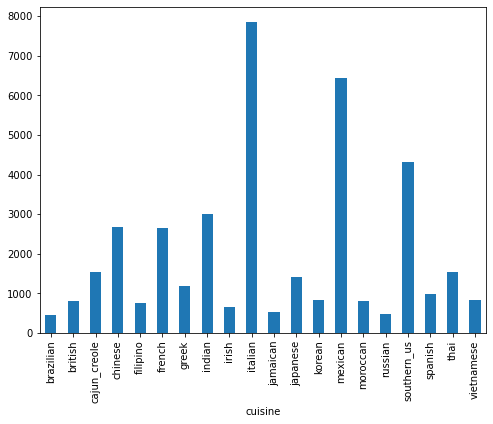

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('cuisine').ingredients.count().plot.bar(ylim=0)
plt.show()

# Imbalanced Cuisines

Number of ingredients per cuisine is imbalanced. Data is more biased towards Italian, Mexican and Southen_US

Minority classes may be treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.ingredients_text).toarray()
labels = df.cuisine_id
features.shape

(39774, 17721)

In [7]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2

for cuisine, cuisine_id in sorted(cuisine_to_id.items()):
  features_chi2 = chi2(features, labels == cuisine_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(cuisine))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'brazilian':
  . Most correlated unigrams:
. acai
. cachaca
  . Most correlated bigrams:
. sugar cachaca
. cachaca lime
# 'british':
  . Most correlated unigrams:
. suet
. stilton
  . Most correlated bigrams:
. stilton cheese
. beef drippings
# 'cajun_creole':
  . Most correlated unigrams:
. creole
. cajun
  . Most correlated bigrams:
. creole seasoning
. cajun seasoning
# 'chinese':
  . Most correlated unigrams:
. chinese
. soy
  . Most correlated bigrams:
. sesame oil
. soy sauce
# 'filipino':
  . Most correlated unigrams:
. lumpia
. calamansi
  . Most correlated bigrams:
. lumpia wrappers
. calamansi juice
# 'french':
  . Most correlated unigrams:
. yolks
. gruyere
  . Most correlated bigrams:
. large egg
. gruyere cheese
# 'greek':
  . Most correlated unigrams:
. crumbles
. feta
  . Most correlated bigrams:
. cheese crumbles
. feta cheese
# 'indian':
  . Most correlated unigrams:
. garam
. masala
  . Most correlated bigrams:
. ground turmeric
. garam masala
# 'irish':
  . Most co

Now, each of 39774 recipes is represented by 17818 features

__________________________________________________
<h1><center>TF-IDF explained</center></h1>

<center>messages = ["hey lets get lunch :)", 
            "Hey!!! I need a favor"]

|    . | favor | get | hey | lets | lunch | need |
|------|-------|-----|-----|------|-------|------|
|   0  | 0.000 |0.534|0.379| 0.534| 0.534 | 0.000|
|   1  | 0.631 |0.000|0.449| 0.000| 0.000 | 0.631|

<br>
<br>
<br>

<center>messages = ["hey hey hey lets get lunch :)", 
            "Hey!!! I need a favor"]

|    . | favor | get | hey | lets | lunch | need |
|------|-------|-----|-----|------|-------|------|
|   0  | 0.000 |0.363|0.776| 0.363| 0.363 | 0.000|
|   1  | 0.631 |0.000|0.449| 0.000| 0.000 | 0.631|

<br>
<br>
<br>

<center>messages = ["hey hey hey lets get lunch :)", 
            "I need a favor"]

|    . | favor | get | hey | lets | lunch | need |
|------|-------|-----|-----|------|-------|------|
|   0  | 0.000 |0.289|0.866| 0.289| 0.289 | 0.000|
|   1  | 0.707 |0.000|0.449| 0.000| 0.000 | 0.707|

__________________________________________________


In [9]:
df.head()

,cuisine,ingredients,cuisine_id,ingredients_text
0,greek,"[romaine lettuce, black olives, grape tomatoes...",0,"romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",1,"plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",2,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,"[water, vegetable oil, wheat, salt]",3,"water, vegetable oil, wheat, salt"
4,indian,"[black pepper, shallots, cornflour, cayenne pe...",3,"black pepper, shallots, cornflour, cayenne pep..."


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 

X_train, X_test, y_train, y_test = train_test_split(df['ingredients_text'], df['cuisine'], random_state = 0)

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [11]:
def predictor(i):
    print("Ingredients are as follow:\n",X_test[i])
    print()
    print("Actual cuisine: ",y_test[i])
    print()
    print("Predicted cuisine: ",clf.predict(tfidf.transform([X_test[i]])))

In [12]:
predictor(21660)
print("_____________________________")
predictor(3281)
print("_____________________________")
predictor(3434)
print("_____________________________")
predictor(8834)
print("_____________________________")
predictor(1328)

Ingredients are as follow:
 kosher salt, vegetables, chinese chives, lo mein noodles, garlic, shiitake mushroom caps, light soy sauce, shaoxing wine, toasted sesame oil, dark soy sauce, white cabbage, ground white pepper

Actual cuisine:  chinese

Predicted cuisine:  ['chinese']
_____________________________
Ingredients are as follow:
 sweet potatoes, pumpkin pie spice, eggs, whipped topping, pie crust mix, mccormick pure vanilla extract, chopped pecans, cold water, salt, sweetened condensed milk

Actual cuisine:  southern_us

Predicted cuisine:  ['southern_us']
_____________________________
Ingredients are as follow:
 tomatoes, baby spinach, garlic cloves, grated romano cheese, extra virgin olive oil, ground black pepper, sea salt, grated parmesan cheese, gluten free pasta

Actual cuisine:  italian

Predicted cuisine:  ['italian']
_____________________________
Ingredients are as follow:
 green chile, pepper, boneless chicken breast, chili powder, reduced fat sour cream, red bell peppe

Not Bad! It seems the model is working. Given input of ingredients, the model is able to output a cuisine.

But is it really that accurate?

Let's compare the accuracy between MultinomialNB() and LinearSVC().

In [13]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    LinearSVC(),
    MultinomialNB()]

models_name = [
    "LinearSVC()",
    "MultinomialNB()"]

i = 0
for model in models:
    print(models_name[i], ":\t",cross_val_score(model, features, labels, scoring='accuracy', cv=5).mean())
    i += 1

LinearSVC() :	 0.7848595704369894
MultinomialNB() :	 0.636093998694884


The predictor() function, using MultinomialNB() may have showed that the model works but with just an accuracy of approximately 67%.

But we can do better with linearSVC(). 

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import seaborn as sns

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
counts = [y_test.value_counts()[x] for x in range(len(cuisine_id_df.cuisine.values))]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


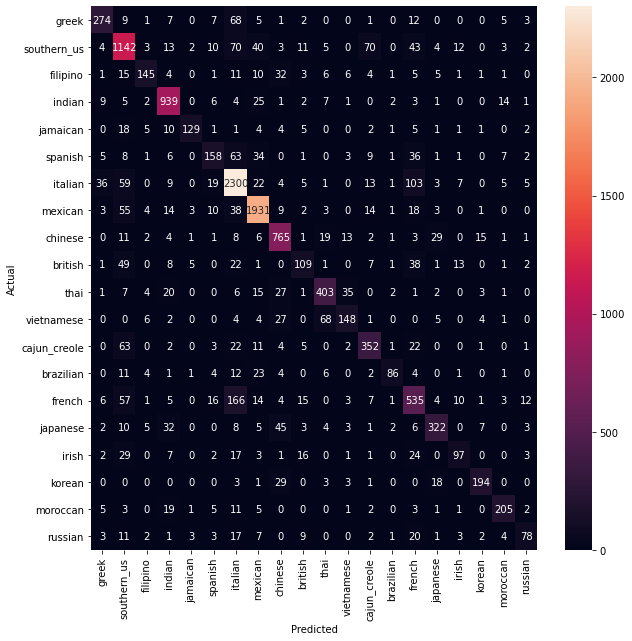

In [15]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=cuisine_id_df.cuisine.values, yticklabels=cuisine_id_df.cuisine.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Most of the predictions is on the diagonal (predicted cuisine = actual cuisine), where we want them to be. 

But there is a noticeable amount of misclassifications in the confusion matrix. 

Below will explain how to interpret this confusion matrix.

<h1><center>Confusion matrix explained</center></h1>

|    . | A | B | C | D |
|------|---|---|---|---|
|   A  | TP| X | X | X |
|   B  | X | TP| X | X |
|   C  | X | X | TP| X |
|   D  | X | X | X | TP|

<center>P illustrates the True Positives for all variables
    
<br>
<hr>


|    . | A | B | C | D |
|------|---|---|---|---|
|   A  | X | X | X | X |
|   B  | X | TN | TN | TN |
|   C  | X | TN | TN | TN |
|   D  | X | TN | TN | TN |

<center>P illustrates the True Negatives for variable A
    
<br>
<hr>


|    . | A | B | C | D |
|------|---|---|---|---|
|   A  | X | X | X | X |
|   B  | FP| X | X | X |
|   C  | FP| X | X | X |
|   D  | FP| X | X | X |

<center>P illustrates the False Positives for variable A
    
<br>
<hr>


|    . | A | B | C | D |
|------|---|---|---|---|
|   A  | X |FN | FN| FN|
|   B  | X | X | X | X |
|   C  | X | X | X | X |
|   D  | X | X | X | X |

<center>P illustrates the False Negative for variable A
    
<br>
<hr>



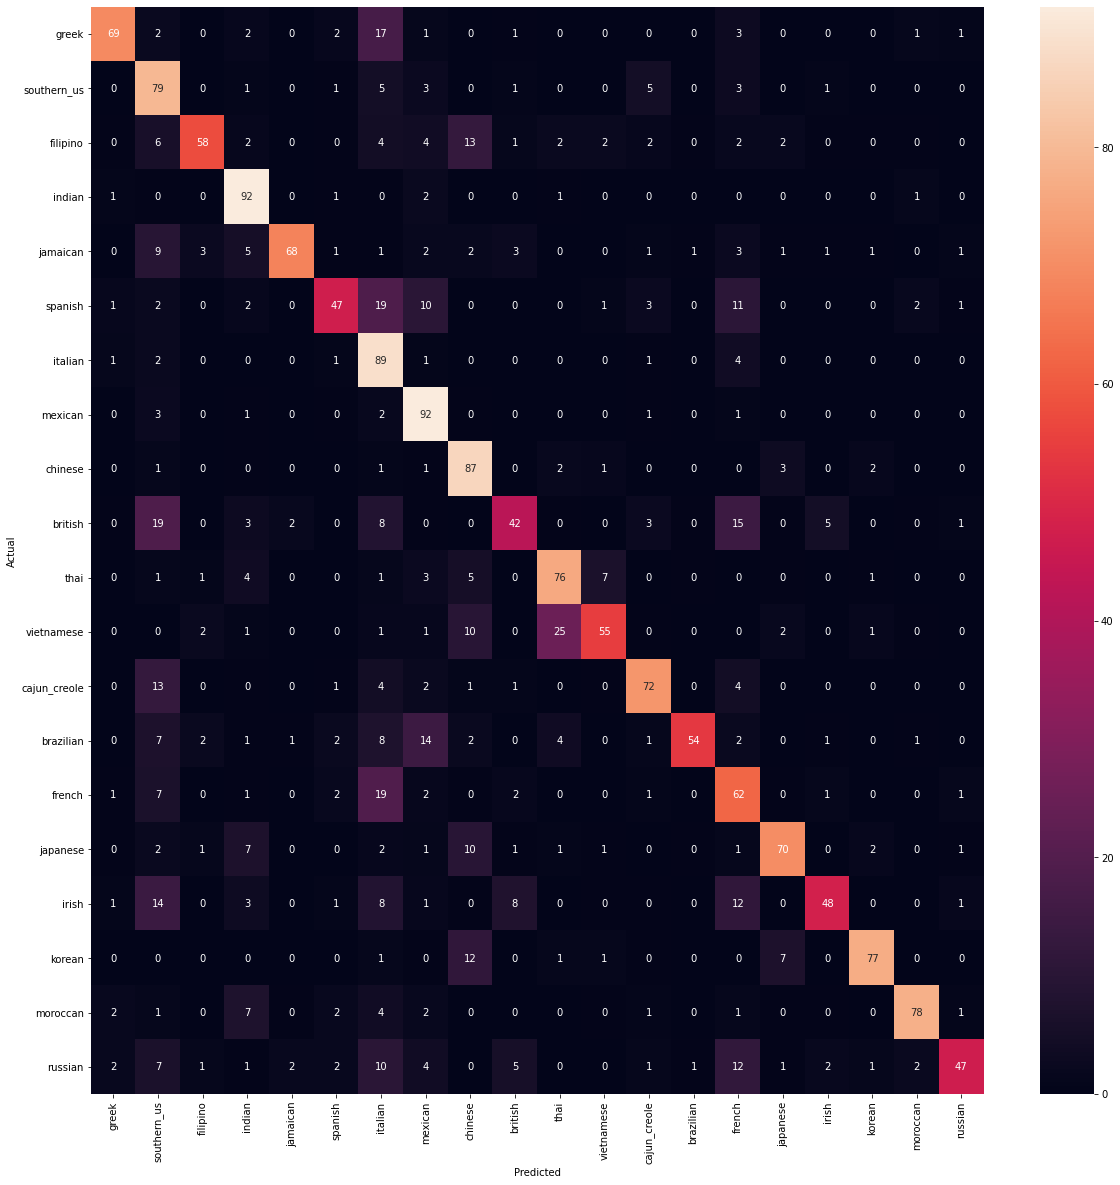

In [16]:
#Misclassification percentage

ratio_mat = [[a/b*100 for a in x] for x,b in zip(conf_mat,counts)]
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(ratio_mat, fmt='.0f', annot=True,
            xticklabels=cuisine_id_df.cuisine.values, yticklabels=cuisine_id_df.cuisine.values, ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

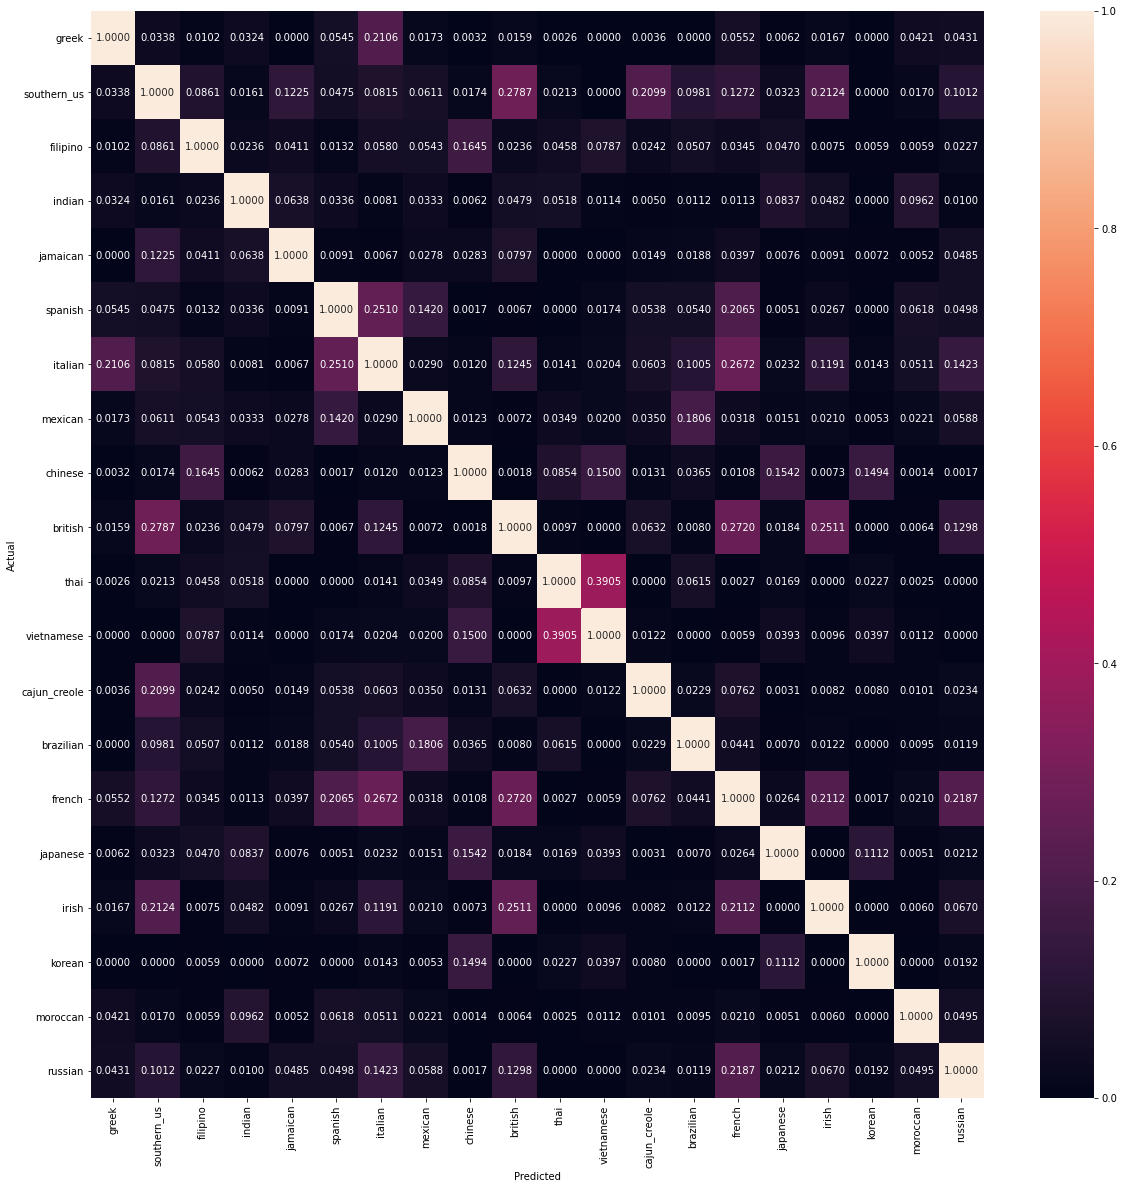

In [17]:
#Subsetness percentage
sim_mat =[[0 for y in x] for x in ratio_mat]
for i in range(len(ratio_mat)):
    for j in range(len(ratio_mat)):
        sum_diff = ratio_mat[i][j]+ratio_mat[j][i]
        sim_mat[i][j] = 2*(sum_diff)/(ratio_mat[i][i] + ratio_mat[j][j] + sum_diff)
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(sim_mat, fmt='.4f', annot=True,
            xticklabels=cuisine_id_df.cuisine.values, yticklabels=cuisine_id_df.cuisine.values, ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

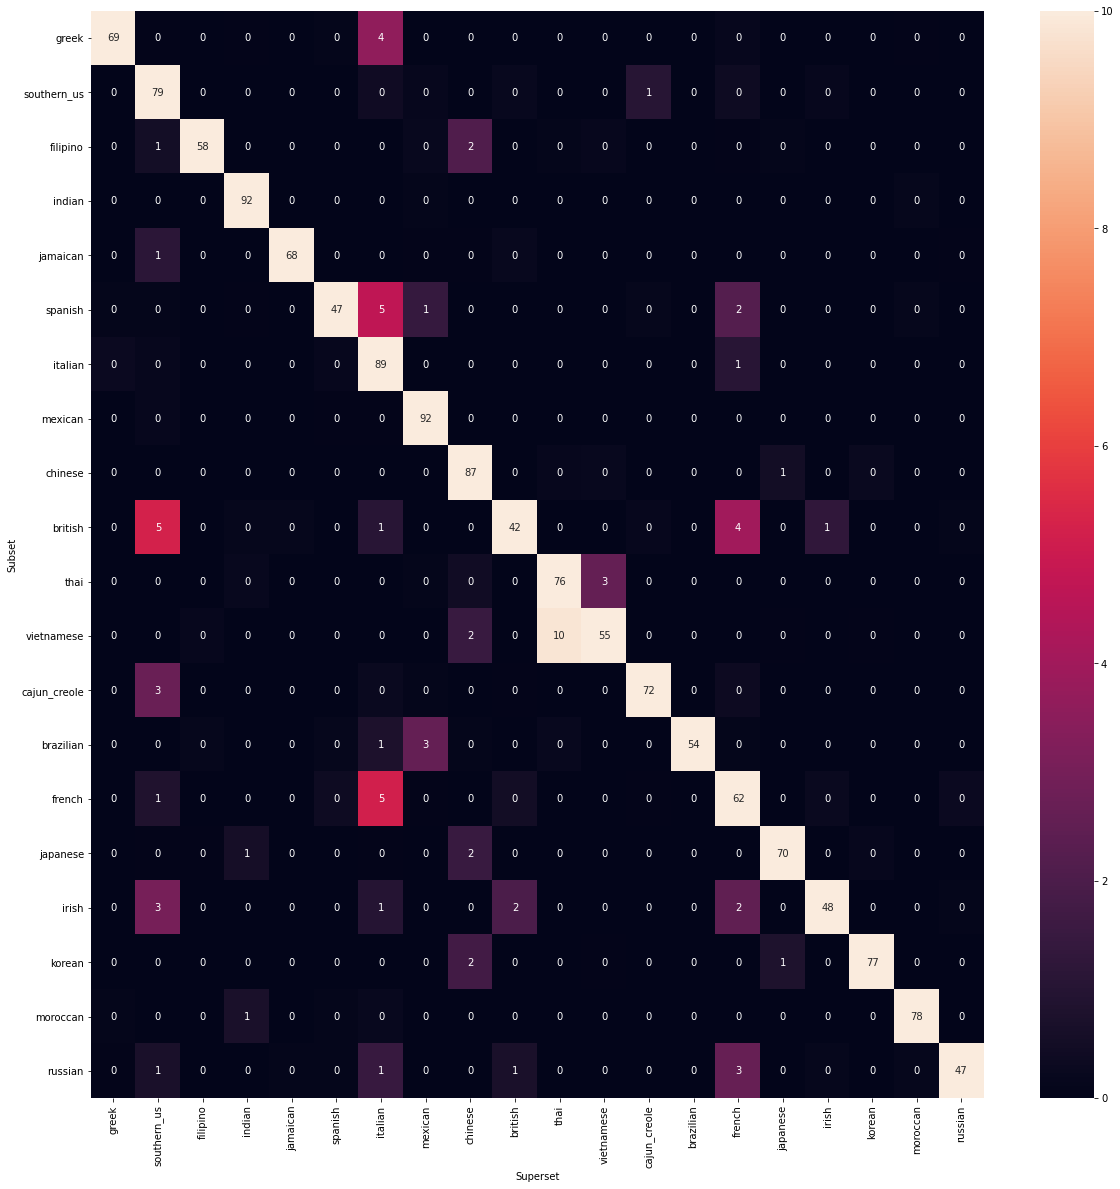

In [18]:
sub_mat = [[0 for y in x] for x in ratio_mat]
for i in range(len(ratio_mat)):
    for j in range(len(ratio_mat)):
        if ratio_mat[j][i] == 0:
            subness = 0
        else:
            subness = (ratio_mat[i][j]) * sim_mat[i][j]
        sub_mat[i][j] = subness
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(sub_mat, fmt='.0f', annot=True,
            xticklabels=cuisine_id_df.cuisine.values, yticklabels=cuisine_id_df.cuisine.values, ax=ax, vmin=0, vmax=10)
plt.ylabel('Subset')
plt.xlabel('Superset')
plt.show()

In [19]:
from IPython.display import display
for predicted in cuisine_id_df.cuisine_id:
  for actual in cuisine_id_df.cuisine_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_cuisine[actual], id_to_cuisine[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['cuisine', 'ingredients_text']])
      print('')

'italian' predicted as 'greek' : 36 examples.


,cuisine,ingredients_text
9048,italian,"honey, frozen mixed berries, unflavored gelati..."
33361,italian,"dried basil, boneless skinless chicken breast ..."
14980,italian,"black beans, penne pasta, green onions, salad ..."
2719,italian,"ground cinnamon, ground black pepper, flour, c..."
1992,italian,"butter, diced onions, medium shrimp, feta chee..."
27174,italian,"basil leaves, salt, olive oil, pimentos, scall..."
2308,italian,"dried basil, roast red peppers, drain, french ..."
8397,italian,"eggplant, cayenne pepper, pepper, garlic, oliv..."
27612,italian,"olive oil, lemon, scallions, pitas, salt, flat..."
8317,italian,"sun dried tomatoes, feta cheese crumbles, bone..."



'filipino' predicted as 'southern_us' : 15 examples.


,cuisine,ingredients_text
36409,filipino,"vegetable oil, eggs, asian eggplants, salt, gr..."
35208,filipino,"cream style corn, coconut cream, vanilla extra..."
9634,filipino,"pepper, scallions, tomatoes, lemon, onions, bu..."
25975,filipino,"lime, sugar, butter, powdered milk, milk"
4487,filipino,"warm water, salt, active dry yeast, plain brea..."
32313,filipino,"white vinegar, up, pork country style ribs, so..."
24688,filipino,"pineapple chunks, raisins, celery, seasoning s..."
30342,filipino,"tomatoes, onions, ginger, hot pepper, fish, salt"
10604,filipino,"candied cherries, graham crackers, fruit cockt..."
38296,filipino,"granulated sugar, vanilla extract, brown sugar..."



'jamaican' predicted as 'southern_us' : 18 examples.


,cuisine,ingredients_text
31456,jamaican,"water, salt, black pepper, vegetable oil, onio..."
9478,jamaican,"chicken broth, minced garlic, ginger, smoked p..."
4510,jamaican,"coffee liqueur, milk, liqueur, flavored syrup,..."
19959,jamaican,"dried thyme, margarine, allspice, stewed tomat..."
13262,jamaican,"kosher salt, unsalted butter, crushed pineappl..."
19544,jamaican,"sugar, all purpose unbleached flour, unsalted ..."
2356,jamaican,"bananas, vanilla extract, nutmeg, cooking oil,..."
5322,jamaican,"ground cinnamon, dark rum, mashed banana, fat,..."
23537,jamaican,"shortening, vanilla extract, white sugar, cold..."
21543,jamaican,"pepper, ground black pepper, salt, water, swee..."



'italian' predicted as 'southern_us' : 59 examples.


,cuisine,ingredients_text
4334,italian,"chocolate cake mix, white sugar, frozen whippe..."
25534,italian,"water, white peaches, lemon juice, sugar, spar..."
16748,italian,"ground pepper, garlic, butternut squash, half ..."
18725,italian,"firmly packed light brown sugar, half & half, ..."
15078,italian,"kosher salt, parmesan cheese, white cheddar ch..."
17875,italian,"sweet onion, ground black pepper, baking potat..."
27275,italian,"fresh lemon juice, clementine juice, sugar, li..."
15755,italian,"garlic powder, salt, eggs, boneless skinless c..."
20176,italian,"sugar, egg yolks, all purpose flour, coconut e..."
2087,italian,"ground black pepper, all purpose flour, idaho ..."



'mexican' predicted as 'southern_us' : 55 examples.


,cuisine,ingredients_text
15910,mexican,"ground pepper, vegetable oil, purple onion, po..."
30734,mexican,"salt, all purpose flour, water, butter"
25004,mexican,"sugar, butter, lemon juice, graham cracker cru..."
14190,mexican,"large eggs, vanilla extract, sugar, cooking sp..."
33815,mexican,"tomatoes, bacon slices, shredded cheddar chees..."
27670,mexican,"corn kernels, garlic cloves, black pepper, okr..."
18787,mexican,"kosher salt, unsalted butter, powdered sugar, ..."
10021,mexican,"hot sauce, brown sugar, chicken thighs, cayenn..."
10894,mexican,"seasoning salt, chuck roast, paprika, beer, gr..."
14484,mexican,"mint sprigs, fresh mint, sugar, fresh raspberr..."



'chinese' predicted as 'southern_us' : 11 examples.


,cuisine,ingredients_text
23876,chinese,"salt, water, chopped garlic, vegetable oil, gr..."
10246,chinese,"water, jalapeno chilies, cucumber, corn kernel..."
11236,chinese,"light brown sugar, rice vinegar, pineapple, wo..."
17959,chinese,"all purpose flour, cold water, boiling water"
8336,chinese,"sugar, red food coloring, brown sugar, fresh g..."
15493,chinese,"vegetable shortening, double acting baking pow..."
32303,chinese,"large eggs, salt, unsalted butter, heavy cream..."
15302,chinese,"sugar, peanut oil, water, walnut halves, glaze"
8408,chinese,"hot red pepper flakes, peanut oil"
24511,chinese,"water, boiling water, flour, crisco, yeast, su..."



'british' predicted as 'southern_us' : 49 examples.


,cuisine,ingredients_text
32862,british,"large eggs, salt, pan drippings, milk, all pur..."
17516,british,"whole milk, chopped fresh sage, kosher salt, b..."
20422,british,"lettuce leaves, sweet gherkin, pickled onion, ..."
23303,british,"potatoes, salt, pepper, butter, milk, kippers,..."
6711,british,"sugar, baking powder, all purpose flour, pure ..."
25486,british,"eggs, salt, milk, melted butter, flour, shorte..."
22526,british,"sugar, butter, milk, cornmeal, warm water, sal..."
35794,british,"dijon mustard, salt, pepper, extra virgin oliv..."
32633,british,"eggs, drippings, water, all purpose flour, mil..."
12687,british,"brown sugar, flour, salt, rolled oats, cinnamo..."



'cajun_creole' predicted as 'southern_us' : 63 examples.


,cuisine,ingredients_text
36704,cajun_creole,"pure vanilla extract, brandy, ground nutmeg, d..."
21941,cajun_creole,"large eggs, pecans, frosting, butter pecan cak..."
26906,cajun_creole,"milk, baking powder, all purpose flour, sugar,..."
25569,cajun_creole,"chicken stock, chives, creole seasoning, smoke..."
2595,cajun_creole,"black pepper, paprika, dill pickles, vegetable..."
...,...,...
10649,cajun_creole,"eggs, shredded carrots, all purpose flour, bak..."
12583,cajun_creole,"pecan halves, extra firm tofu, vanilla extract..."
10230,cajun_creole,"garlic powder, onion powder, celery seed, grou..."
1271,cajun_creole,"black eyed peas, all purpose flour, vegetable ..."



'brazilian' predicted as 'southern_us' : 11 examples.


,cuisine,ingredients_text
37743,brazilian,"sweetened condensed milk, roasted peanuts, bis..."
9665,brazilian,"powdered sugar, heavy cream, corn starch, pure..."
18618,brazilian,"minced garlic, kosher salt, shallots, pepper, ..."
34190,brazilian,"olive oil, collard greens, rib, salt, black pe..."
8362,brazilian,"potatoes, frozen corn kernels, mayonaise, appl..."
18232,brazilian,"orange juice, eggs, sugar"
32128,brazilian,"shredded coconut, hemp seeds, frozen peaches, ..."
39061,brazilian,"bay leaves, salt, chicken, paprika, garlic clo..."
32493,brazilian,"black pepper, garlic, chicken broth, bacon sli..."
7269,brazilian,"dried black beans, linguica, vegetable oil, sa..."



'french' predicted as 'southern_us' : 57 examples.


,cuisine,ingredients_text
14999,french,"butter, lemon pepper, pork tenderloin, dijon s..."
21738,french,"rum, pitted prunes, vanilla sugar, salt, eggs,..."
23732,french,"ground nutmeg, salt, salmon fillets, butter, c..."
33831,french,"fontina cheese, pastry shell, eggs, sage leave..."
12556,french,"large eggs, chocolate chips, unsalted butter, ..."
13368,french,"sugar, half & half, large egg yolks, tea bags"
22827,french,"ground cinnamon, milk, all purpose flour, suga..."
35532,french,"milk, grated nutmeg, salt, butter, all purpose..."
15530,french,"water, whipping cream, butter, shallots, salt,..."
12825,french,"sugar, butter, unsalted butter, milk, vanilla ..."



'japanese' predicted as 'southern_us' : 10 examples.


,cuisine,ingredients_text
8172,japanese,"light cream or half and half, lipton green tea..."
35209,japanese,"milk, cake flour, sugar, butter, corn starch, ..."
124,japanese,"pepper, panko breadcrumbs, plain flour, oil, s..."
34338,japanese,"water, salt, mayonaise, garlic juice, ground w..."
11476,japanese,"chicken bouillon, large eggs, corn starch, sug..."
8859,japanese,"baking powder, granulated sugar, all purpose f..."
5808,japanese,"eggs, butter, whole milk, vanilla extract, moc..."
101,japanese,"prawns, rice flour, seasoning salt, salt, vege..."
15811,japanese,"rice, canola oil, egg yolks, corn starch, baki..."
33068,japanese,"salt, edamame, seasoning salt"



'irish' predicted as 'southern_us' : 29 examples.


,cuisine,ingredients_text
24255,irish,"cookies, water, vanilla, flour, walnuts, sugar..."
13979,irish,"unsalted butter, buttermilk, caraway seeds, la..."
38281,irish,"salt, milk, white sugar, baking soda, white vi..."
30910,irish,"cinnamon, confectioners sugar, superfine sugar..."
29300,irish,"ground ginger, large eggs, custard, freshly gr..."
21270,irish,"baking soda, salt, caraway seeds, raisins, col..."
4640,irish,"bacon drippings, bacon, ground black pepper, c..."
13624,irish,"white bread, large free range egg, pure vanill..."
32504,irish,"black pepper, extra sharp white cheddar cheese..."
38438,irish,"baking powder, all purpose flour, vanilla extr..."



'russian' predicted as 'southern_us' : 11 examples.


,cuisine,ingredients_text
1067,russian,"large eggs, granny smith apples, baking powder..."
6730,russian,"white bread, ground black pepper, garlic clove..."
34649,russian,"reduced sodium chicken broth, smoked kielbasa,..."
25649,russian,"honey, butter, all purpose flour, pure vanilla..."
38351,russian,"sugar, salt, baking powder, oil, large eggs, a..."
23736,russian,"sugar, cranberries, potato flour, water"
19221,russian,"sugar, unsalted butter, salt, cream cheese, po..."
16864,russian,"salt, water, yeast, baking powder, sugar, all ..."
1362,russian,"kosher salt, grated nutmeg, sugar, almond extr..."
13202,russian,"ground black pepper, salt, mayonaise, hard boi..."



'southern_us' predicted as 'indian' : 13 examples.


,cuisine,ingredients_text
26479,southern_us,"green onions, salt, sweetened coconut flakes, ..."
34709,southern_us,"golden raisins, almonds, raisins, salt and gro..."
22495,southern_us,"white vinegar, fresh ginger, onions, fresh bas..."
31121,southern_us,"cooked chicken, diced celery, green onions, gi..."
3633,southern_us,"ground cinnamon, curry powder, diced tomatoes,..."
39249,southern_us,"mint, bitters, water, whisky, sugar cubes, min..."
27847,southern_us,"chicken stock, curry powder, crushed red peppe..."
242,southern_us,"ground black pepper, okra, canola oil, tomatoe..."
12229,southern_us,"fresh chives, mango chutney, salt, ground cori..."
7156,southern_us,"eggs, olive oil, brown mustard seeds, salt, ca..."



'jamaican' predicted as 'indian' : 10 examples.


,cuisine,ingredients_text
7756,jamaican,"unsweetened coconut milk, fresh ginger, onions..."
27576,jamaican,"tomatoes, curry powder, oil, pepper, sweet pep..."
9374,jamaican,"garlic powder, fat free yogurt, sesame oil, fr..."
20871,jamaican,"sugar, amber rum, ice cubes, orange, clove, wa..."
10838,jamaican,"pepper, butter, coconut milk, any, curry, oliv..."
12846,jamaican,"unsweetened shredded dried coconut, bananas, r..."
29089,jamaican,"pepper, oil, meat, onions, salt, curry powder,..."
15183,jamaican,"curry powder, salt, onions, extra virgin olive..."
23629,jamaican,"red chili peppers, chicken breasts, rice, red ..."
7910,jamaican,"curry powder, potatoes, coconut milk, chicken ..."



'mexican' predicted as 'indian' : 14 examples.


,cuisine,ingredients_text
15988,mexican,"tamarind, large shrimp"
16097,mexican,"powdered sugar, fine salt, pure vanilla extrac..."
24929,mexican,"soy sauce, unsalted butter, ground pork, cream..."
30023,mexican,"shredded cabbage, carrots, chopped cilantro fr..."
2656,mexican,"water, tamarind concentrate, sugar"
35462,mexican,"pepper, ground turmeric, pineapple juice, cide..."
794,mexican,"pepper, vegetable oil, green chilies, chuck, w..."
31226,mexican,"salt, water, garlic, green chilies"
29195,mexican,"vegetable oil, water, salt, red chili peppers,..."
26887,mexican,vegetable oil



'thai' predicted as 'indian' : 20 examples.


,cuisine,ingredients_text
15024,thai,"white vinegar, potatoes, vegetable oil, ground..."
14012,thai,"jalapeno chilies, ginger, oil, tomatoes, butte..."
11064,thai,"fresh cilantro, sweet potatoes, garlic, red be..."
35083,thai,"lemongrass, salt, tumeric, green onions, water..."
28747,thai,"lemongrass, peeled fresh ginger, less sodium b..."
32104,thai,"tumeric, cayenne, chinese five spice powder, p..."
38451,thai,"bread, lime juice, thai chile, water, sriracha..."
33643,thai,"cider vinegar, golden raisins, garlic cloves, ..."
36389,thai,"water, mushrooms, green chilies, mango, lime, ..."
10190,thai,"mayonaise, cilantro leaves, chopped cilantro f..."



'japanese' predicted as 'indian' : 32 examples.


,cuisine,ingredients_text
1316,japanese,"white onion, bay leaves, coriander, tumeric, g..."
19497,japanese,"caster sugar, green cardamom pods, vegetable o..."
29371,japanese,"red chili powder, garam masala, oil, onions, r..."
12430,japanese,"tumeric, vegetable oil, cumin seed, coriander,..."
2749,japanese,"milk, saffron, sugar, ghee, rose water, nuts, ..."
39666,japanese,"green chilies, melon, ginger, celery seed, cil..."
1773,japanese,"kosher salt, peeled fresh ginger, garlic clove..."
1480,japanese,"unsalted butter, carrots, sugar, unsalted cash..."
12473,japanese,"rice, dal, ginger, oil, spinach, green chilies..."
5543,japanese,"red chili powder, lemon, cumin seed, coriander..."



'moroccan' predicted as 'indian' : 19 examples.


,cuisine,ingredients_text
37800,moroccan,"ground cloves, sea salt, apple juice, ground c..."
33937,moroccan,"seasoning salt, carrots, chicken broth, almond..."
18596,moroccan,"whole wheat pita, boneless skinless chicken br..."
30985,moroccan,"ground ginger, garlic powder, ground tumeric, ..."
20278,moroccan,"ground black pepper, ground turmeric, salt, ba..."
18559,moroccan,"butter, salt, tumeric, paprika, chicken thighs..."
1561,moroccan,"eggplant, curry powder, carrots, zucchini, yel..."
3849,moroccan,"tomato sauce, olive oil, diced tomatoes, chick..."
29283,moroccan,"capers, cooking spray, salt, ground cinnamon, ..."
21069,moroccan,"clove, coriander seeds, salt, chopped garlic, ..."



'southern_us' predicted as 'spanish' : 10 examples.


,cuisine,ingredients_text
12740,southern_us,"sugar, salt, olive oil, pepper, vinegar"
17472,southern_us,"dark rum, fresh pineapple, brandy, carbonated ..."
19700,southern_us,"teas, vanilla beans, apple juice concentrate, ..."
30675,southern_us,"cranberry juice, fresh orange juice, ice cubes..."
26294,southern_us,"mixed spice, potatoes, olive oil, honey, pork ..."
30739,southern_us,"fresh spinach, balsamic vinegar, orange juice,..."
27583,southern_us,"rump roast, salt, dried thyme, dried rosemary,..."
20397,southern_us,"red wine vinegar, smoked paprika, roasted red ..."
15688,southern_us,"sugar, orange rind, teas"
12018,southern_us,"sesame oil, sweet paprika, honey, diced tomato..."



'italian' predicted as 'spanish' : 19 examples.


,cuisine,ingredients_text
29279,italian,"butter, flat leaf parsley, pepper, sea salt, b..."
15500,italian,"port wine, raisins, peaches, freshly ground pe..."
37834,italian,"kosher salt, fresh lemon juice, extra virgin o..."
9959,italian,"seedless cucumber, ricard, water, sugar"
18309,italian,"cinnamon, corn starch, sugar, sea salt, dark c..."
29783,italian,"sugar, all purpose unbleached flour, baking so..."
3435,italian,"dry white wine, onions, green bell pepper, gar..."
10792,italian,"large eggs, sugar, blackberries, reduced fat s..."
18622,italian,"black pepper, kalamata, olive oil, fresh orega..."
29218,italian,"angostura bitters, strawberries, raspberries, ..."



'mexican' predicted as 'spanish' : 10 examples.


,cuisine,ingredients_text
1244,mexican,"orange, lemon, black pepper, cooking spray, ch..."
15109,mexican,"tomatoes, manchego cheese, white rice, sour cr..."
26261,mexican,"green bell pepper, paprika, cucumber, vegetabl..."
4029,mexican,"olive oil, diced tomatoes, ground cumin, chick..."
21678,mexican,"orange, paprika, onions, kosher salt, butter, ..."
8645,mexican,"pure vanilla extract, baking soda, cinnamon st..."
24406,mexican,"black beans, green beans, sausages, spanish ri..."
17884,mexican,"eggs, artichok heart marin, pepper, coarse sal..."
17953,mexican,"chili powder, sour cream, olive oil, cayenne p..."
21978,mexican,"kosher salt, serrano chile, extra virgin olive..."



'french' predicted as 'spanish' : 16 examples.


,cuisine,ingredients_text
30434,french,"red potato, extra virgin olive oil, flat leaf ..."
3190,french,"bay leaves, onions, peeled tomatoes, paprika, ..."
27744,french,"heavy cream, low sodium chicken broth, boiling..."
8060,french,"brandy, lemon, sugar, whole cloves, orange, ci..."
26970,french,"fresh marjoram, whole peeled tomatoes, extra v..."
23447,french,"chicken broth, truffles, pimentos, green peppe..."
20697,french,"water, salt, green olives, bay leaves, thyme s..."
340,french,"jumbo shrimp, baguette, extra virgin olive oil..."
18373,french,"eggs, milk, orange juice, orange zest, orange,..."
11026,french,"bottled clam juice, dried thyme, roasted red p..."



'greek' predicted as 'italian' : 68 examples.


,cuisine,ingredients_text
13140,greek,"grated parmesan cheese, orzo, dried oregano, f..."
1877,greek,"branzino, dried oregano, kosher salt, black pe..."
30327,greek,"olive oil, salt, fresh dill, large garlic clov..."
14414,greek,"fresh basil, eggplant, red wine vinegar, fresh..."
352,greek,"mint leaves, sliced almonds, vanilla lowfat yo..."
...,...,...
12381,greek,"black pepper, balsamic vinegar, red bell peppe..."
30659,greek,"fresh rosemary, garlic, chopped fresh thyme, c..."
15497,greek,"boneless chicken skinless thigh, olive oil, ka..."
22327,greek,"strong white bread flour, yeast, olive oil, wa..."



'southern_us' predicted as 'italian' : 70 examples.


,cuisine,ingredients_text
22235,southern_us,"honey, hellmann' or best food real mayonnais, ..."
34280,southern_us,"grape tomatoes, green onions, olive oil, salt,..."
24205,southern_us,"bread crumbs, parmesan cheese, salt, fresh par..."
16366,southern_us,"pepper, salt, olive oil, fresh lime juice, min..."
16169,southern_us,"sugar, unsalted butter, chocolate shavings, ch..."
...,...,...
15182,southern_us,"egg whites, butter, confectioners sugar, water..."
11482,southern_us,"prepared mustard, garlic salt, eggs, salt, bre..."
18350,southern_us,"shredded cheddar cheese, bacon, crackers, toma..."
12954,southern_us,"chocolate, peanuts, vanilla cream"



'filipino' predicted as 'italian' : 11 examples.


,cuisine,ingredients_text
4326,filipino,"mayonaise, ground black pepper, dried basil, b..."
3127,filipino,"tomato sauce, minced garlic, vegetable oil, ke..."
18511,filipino,"rolls, ground chicken, ground beef, water, gro..."
7757,filipino,"sugar, raisins, juice, penne, macaroni, salt, ..."
4803,filipino,"egg yolks, white sugar, melted butter, all pur..."
18923,filipino,"melted butter, grated parmesan cheese, tilapia..."
30798,filipino,"dry white wine, yellow onion, heavy cream, sli..."
8382,filipino,"sugar, salt, fast rising yeast, water, eggs, v..."
19042,filipino,"vegetable oil, all purpose flour, large eggs, ..."
21344,filipino,"sugar, dry bread crumbs, bread, evaporated mil..."



'spanish' predicted as 'italian' : 63 examples.


,cuisine,ingredients_text
18801,spanish,"eggs, milk, garlic, onions, nutmeg, bread crum..."
12914,spanish,"large eggs, basil, cherry tomatoes, flour, sal..."
20788,spanish,"extra virgin olive oil, red chili peppers, fre..."
34747,spanish,"butter, garlic, turkey, adobo seasoning, rosem..."
18027,spanish,"tomatoes, sweet onion, plum tomatoes, fresh ba..."
...,...,...
22316,spanish,"large eggs, fresh parsley, pepper, salt, olive..."
12992,spanish,"green bell pepper, bay leaves, littleneck clam..."
23628,spanish,"sugar, extra virgin olive oil, large garlic cl..."
17327,spanish,"grated orange peel, dry white wine, crushed re..."



'mexican' predicted as 'italian' : 38 examples.


,cuisine,ingredients_text
34351,mexican,"milk, extra virgin olive oil, chicken breasts,..."
9737,mexican,"diced tomatoes, american cheese, spicy pork sa..."
26612,mexican,"jalapeno chilies, garlic, green olives, salmon..."
6289,mexican,"coconut oil, garlic, ground cumin, cheddar che..."
8030,mexican,"water, fresh oregano, large garlic cloves, dri..."
13528,mexican,"butter, confectioners sugar, all purpose flour..."
35550,mexican,"country white bread, mascarpone, olive oil, sa..."
1145,mexican,"purple onion, kosher salt, tomatoes, basil leaves"
26625,mexican,"olive oil, clove garlic, fine chop, sausages, ..."
32124,mexican,"dried thyme, lemon juice, vegetable oil, dried..."



'british' predicted as 'italian' : 22 examples.


,cuisine,ingredients_text
27155,british,"stout, vanilla ice cream, blackberry brandy"
16146,british,"milk, flour, butter, garlic cloves, cheddar ch..."
17879,british,"cookies, heavy whipping cream, strawberries, v..."
21622,british,"water, fresh raspberries, white bread, white s..."
30715,british,"currant jelly, salt, bread crumbs, eggs, milk,..."
7139,british,"black pepper, vegetable oil, all purpose flour..."
12664,british,"white bread, sea salt, marrow bones, shallots,..."
31274,british,"ground cinnamon, ground nutmeg, grated lemon z..."
18285,british,"egg yolks, all purpose flour, english walnuts,..."
38357,british,"fresh rosemary, ground black pepper, vegetable..."



'cajun_creole' predicted as 'italian' : 22 examples.


,cuisine,ingredients_text
39024,cajun_creole,"olive oil, shredded mozzarella cheese, pasta, ..."
33679,cajun_creole,"tomato sauce, bell pepper, fresh parsley, drie..."
33342,cajun_creole,"tomato paste, flour, dry sherry, salt, shrimp,..."
32552,cajun_creole,"pasta sauce, butter, garlic, uncook medium shr..."
10892,cajun_creole,"pasta, parmesan cheese, ground beef, cumin, dr..."
25112,cajun_creole,"fresh basil, salt, fresh parsley, artichok hea..."
3272,cajun_creole,"ground black pepper, italian bread, fresh pars..."
21828,cajun_creole,"bread crumbs, unbleached flour, vegetable oil,..."
18260,cajun_creole,"vegetable oil, all purpose flour"
8870,cajun_creole,"pepper, cream cheese, soften, fontina cheese, ..."



'brazilian' predicted as 'italian' : 12 examples.


,cuisine,ingredients_text
21241,brazilian,"baobab fruit powder, sweet cherries, kale, alm..."
15179,brazilian,"tomatoes, unsalted butter, crushed red pepper ..."
15561,brazilian,"tomatoes, rolls, roast beef deli meat, mozzare..."
14696,brazilian,"olive oil, bread flour, salt, yellow corn meal..."
21332,brazilian,"bouillon powder, potatoes, garlic cloves, spic..."
17273,brazilian,"ground black pepper, chimichurri, skirt steak,..."
16693,brazilian,"baguette, coffee, milk, ham, orange, chocolate..."
10062,brazilian,"cider vinegar, salt, flat leaf parsley, sugar,..."
28121,brazilian,"eggs, grated parmesan cheese, mozzarella chees..."
33210,brazilian,"melted butter, mozzarella cheese, pizza season..."



'french' predicted as 'italian' : 166 examples.


,cuisine,ingredients_text
23312,french,"mint sprigs, berries, sugar, grated lemon zest..."
23527,french,"sliced almonds, sourdough, brie cheese, choppe..."
28620,french,"belgian endive, olive oil, crumbled gorgonzola..."
31833,french,"fennel seeds, dry white wine, garlic, large sh..."
17146,french,"unsalted butter, basil, all purpose flour, fon..."
...,...,...
3324,french,"english mustard, lobster, fish stock, ground b..."
25562,french,"sugar, frangelico, large eggs, white chocolate..."
34513,french,"eggs, semisweet chocolate, white sugar, coffee..."
17137,french,"salt, fresh lemon juice, lemon wedge, fresh he..."



'irish' predicted as 'italian' : 17 examples.


,cuisine,ingredients_text
32443,irish,"black pepper, bacon, onions, fresh tomatoes, p..."
194,irish,"steel cut oats, salt, ground cinnamon, water, ..."
36380,irish,"eggs, white chocolate chips, all purpose flour..."
33959,irish,"sliced almonds, dried apricot, low fat milk, g..."
22608,irish,"egg whites, butter, grated lemon zest, light b..."
20827,irish,"mozzarella cheese, sweet italian sausage, grou..."
3740,irish,"vegetable stock, salt, extra virgin olive oil,..."
4415,irish,"whole milk, grated nutmeg, ground black pepper..."
26020,irish,"rhubarb, whipped topping, pie dough, all purpo..."
25357,irish,"black peppercorns, garlic, olive oil, store bo..."



'moroccan' predicted as 'italian' : 11 examples.


,cuisine,ingredients_text
27513,moroccan,"eggs, milk, baking powder, warm water, semolin..."
32955,moroccan,"pepper, parsley, cayenne pepper, sugar, choppe..."
11969,moroccan,"active dry yeast, all purpose flour, semolina ..."
3603,moroccan,"honey, barley flour, water, salt, cornmeal, ac..."
28961,moroccan,"fresh rosemary, chicken, sherry vinegar, koshe..."
14085,moroccan,"fresh rosemary, fresh lemon juice, sea salt, l..."
13977,moroccan,"kosher salt, all purpose flour, dry yeast, coo..."
21574,moroccan,"italian parsley leaves, fresh mint, ground bla..."
33577,moroccan,"cooking spray, crushed red pepper, canola oil,..."
25492,moroccan,"fat free less sodium chicken broth, mixed drie..."



'russian' predicted as 'italian' : 17 examples.


,cuisine,ingredients_text
23166,russian,"sliced almonds, dried apricot, candy sprinkles..."
38970,russian,"boysenberries, salt, fresh lemon juice, sugar,..."
21947,russian,"large eggs, ricotta cheese, sour cream, melted..."
6020,russian,"semolina flour, canola oil, eggs, white sugar,..."
8154,russian,"sugar, oil, raisins, baking powder, eggs, all ..."
16414,russian,"honey, whipping cream, slivered almonds, poppy..."
33947,russian,"bread crumb fresh, russet potatoes, dried porc..."
13395,russian,"baking apples, all purpose flour, butter, eggs..."
17628,russian,"sugar, milk, almond extract, softened butter, ..."
24537,russian,"rye bread, water, active dry yeast, sugar, rai..."



'southern_us' predicted as 'mexican' : 40 examples.


,cuisine,ingredients_text
22469,southern_us,"minced garlic, shrimp, butter, lobster tails, ..."
25399,southern_us,"butter, pepper, cumin seed, white hominy, salt"
13911,southern_us,"whole milk, unsalted butter, grated horseradis..."
34411,southern_us,"minced garlic, chili powder, ground cumin, red..."
18512,southern_us,"tomatillos, salt, chopped cilantro fresh, pobl..."
33249,southern_us,"diced onions, milk, baking powder, chiles, jal..."
6534,southern_us,"shredded cheddar cheese, flour, chopped celery..."
18317,southern_us,"ritz crackers, onions, seasoning, sour cream, ..."
12798,southern_us,"ground black pepper, ancho powder, cayenne pep..."
7327,southern_us,"diced tomatoes, potatoes, frozen corn kernels,..."



'filipino' predicted as 'mexican' : 10 examples.


,cuisine,ingredients_text
35782,filipino,"soy sauce, garlic, lime juice, oyster sauce, b..."
26058,filipino,"tomatoes, shredded lettuce, minced onion, grou..."
8134,filipino,"sugar, avocado, lemon juice, evaporated milk, ..."
33938,filipino,"lime juice, black bean and corn salsa, eggs, j..."
13984,filipino,"green bell pepper, lime juice, diced tomatoes,..."
18444,filipino,"garlic powder, dried oregano, light brown suga..."
25904,filipino,"eggs, ground pepper, garlic cloves, soy sauce,..."
28994,filipino,"onion powder, ground cumin, ground black peppe..."
12435,filipino,"water, butter, cheddar cheese, flour, eggs, ev..."
28173,filipino,"mayonaise, mussels, lime, sweet chili sauce, c..."



'indian' predicted as 'mexican' : 25 examples.


,cuisine,ingredients_text
18829,indian,"tomatoes, lemon, chopped cilantro, kosher salt..."
36007,indian,"cucumber, fresh cilantro, sugar, nonfat yogurt"
17554,indian,"fat free less sodium chicken broth, ground cor..."
32927,indian,"green chilies, onions, cilantro leaves"
19863,indian,"lime, lime wedges, purple onion, chopped cilan..."
24055,indian,"lime rind, chopped fresh mint, purple onion, k..."
37473,indian,"mint leaves, water, salt, lime juice, white su..."
11881,indian,"oil, warm water, chapatti flour, salt"
16270,indian,"crushed red pepper, white vinegar, hot water, ..."
6313,indian,"indian spice, tempeh, cherry tomatoes, fresh h..."



'spanish' predicted as 'mexican' : 34 examples.


,cuisine,ingredients_text
33908,spanish,"chiles, green plantains, garlic cloves, choppe..."
15104,spanish,"granulated sugar, garlic, beer, plum tomatoes,..."
3042,spanish,"tomato paste, tomato juice, cucumber, green be..."
14385,spanish,"sugar, salt, pure vanilla extract, evaporated ..."
19047,spanish,"sugar, cinnamon sticks, nuts, water"
2019,spanish,"lime rind, salt, ground cumin, fish fillets, g..."
1007,spanish,"olive oil, cooking spray, fresh lime juice, gr..."
23021,spanish,"tomatoes, jalapeno chilies, salt, lime juice, ..."
36333,spanish,"base, fresh lime juice, ground black pepper, b..."
26139,spanish,"ground cinnamon, large eggs, fat free milk, sw..."



'italian' predicted as 'mexican' : 22 examples.


,cuisine,ingredients_text
28396,italian,"brown rice syrup, whole wheat pastry flour, se..."
30902,italian,"marinara sauce, onions, water, condensed cream..."
3721,italian,"seedless watermelon, fresh lime juice, sugar"
5116,italian,"mayonaise, salt, white vinegar, whole milk, sm..."
5930,italian,"olive oil, cheese, ground beef, tomato sauce, ..."
19194,italian,"amaretto, orange liqueur, lime slices, confect..."
3675,italian,"bread crumbs, hot sauce, ground cumin, vegetab..."
25027,italian,"green beans, chicken breasts, red potato, seas..."
12108,italian,"tomato sauce, fresh mushrooms, garlic, boneles..."
21720,italian,"chili powder, shredded cheese, unsalted butter..."



'thai' predicted as 'mexican' : 15 examples.


,cuisine,ingredients_text
15650,thai,"low sodium soy sauce, plum sauce, chopped cila..."
19407,thai,"kosher salt, rice powder, shallots, stock, lem..."
39595,thai,"coconut oil, brown rice, garlic chili sauce, r..."
30241,thai,"lime wedges, chicken noodle soup, coconut milk..."
21285,thai,"soy sauce, jalapeno chilies, crushed red peppe..."
11981,thai,"tomato sauce, serrano chilies, golden raisins,..."
29061,thai,"white wine, heavy cream, salt and ground black..."
12319,thai,"fresh cilantro, green onions, hot water, cooke..."
12467,thai,"seasoning, cilantro sprigs, chopped cilantro f..."
24808,thai,"brown sugar, pepper, flank steak, salt, choppe..."



'cajun_creole' predicted as 'mexican' : 11 examples.


,cuisine,ingredients_text
10960,cajun_creole,"pepper, salt, ground beef, bay leaves, ham hoc..."
690,cajun_creole,"kale, ground black pepper, chili powder, salt,..."
31233,cajun_creole,"milk, chopped fresh chives, heavy cream, small..."
39645,cajun_creole,"black beans, diced tomatoes, whole kernel corn..."
2702,cajun_creole,"reduced sodium chicken broth, boneless skinles..."
36973,cajun_creole,"water, salt, diced onions, boneless skinless c..."
26250,cajun_creole,"heavy cream, fresh lime juice, orange, fresh l..."
31155,cajun_creole,"black beans, chopped celery, chopped garlic, w..."
15363,cajun_creole,"lime juice, salt, seasoning, hot pepper sauce,..."
30259,cajun_creole,"celery ribs, olive oil, garlic, cumin, chicken..."



'brazilian' predicted as 'mexican' : 23 examples.


,cuisine,ingredients_text
834,brazilian,"olive oil, low sodium chicken broth, cilantro ..."
28815,brazilian,"dried black beans, red wine vinegar, hot sauce..."
11025,brazilian,"mayonaise, green onions, salt, olives, ground ..."
35512,brazilian,"milk, sweetened condensed milk, mango, vanilla..."
37027,brazilian,"tomatoes, salt, italian plum tomatoes, onions,..."
37362,brazilian,"garlic, long grain rice, water, hot sauce, oli..."
39238,brazilian,"minced garlic, olive oil, salt, tilapia fillet..."
12468,brazilian,"juice, frozen strawberries"
33999,brazilian,"water, salt, dried oregano, tofu, paprika, red..."
22417,brazilian,"refried black beans, dende oil, buttermilk, sa..."



'french' predicted as 'mexican' : 14 examples.


,cuisine,ingredients_text
15944,french,"tomatoes, flour, salt, dried oregano, white vi..."
35758,french,"milk, cracked black pepper, xanthan gum, unsal..."
24039,french,"green bell pepper, dijon mustard, purple onion..."
32405,french,"salt, fresh lemon juice, strawberries, sugar"
22734,french,"waffle, blackberries, low fat plain yogurt, ho..."
31349,french,"carrots, diced onions, beef broth, navy beans,..."
35669,french,"green chile, cooked chicken, garlic, onions, g..."
11265,french,"chopped walnuts, brown sugar, white sugar, gro..."
20826,french,"milk, confectioners sugar, unsweetened chocola..."
22574,french,"light cream, champagne, salt, seedless cucumbe..."



'filipino' predicted as 'chinese' : 32 examples.


,cuisine,ingredients_text
20997,filipino,"soy sauce, fresh mushrooms, canola oil, brocco..."
26948,filipino,"soy sauce, egg whites, salt, msg, vegetable oi..."
5797,filipino,"chicken broth, water, garlic, fish sauce, gree..."
30623,filipino,"large egg whites, sesame oil, peanut oil, soy ..."
12722,filipino,"fish sauce, spring onions, soy sauce, ground p..."
4191,filipino,"black peppercorns, chili, garlic cloves, pork ..."
29896,filipino,"sugar, corn starch, salt, water, soy sauce, broth"
23209,filipino,"sesame seeds, water, sugar, glutinous rice flo..."
355,filipino,"sugar, water, shredded coconut, glutinous rice..."
32439,filipino,"green onions, garlic, onions, water, vegetable..."



'thai' predicted as 'chinese' : 27 examples.


,cuisine,ingredients_text
38499,thai,"white pepper, green onions, raisins, cashew nu..."
22624,thai,"base, butter, carrots, molasses, peeled fresh ..."
345,thai,"fish sauce, hot red pepper flakes, cider vineg..."
22372,thai,"soy sauce, rice vinegar, stir fry vegetable bl..."
28333,thai,"soy sauce, green onions, corn starch, fresh gi..."
18806,thai,"minced garlic, green onions, peanut butter, po..."
22358,thai,"sesame seeds, rice vinegar, spaghetti, soy sau..."
33368,thai,"tofu, coriander seeds, green chilies, jeera, b..."
32253,thai,"cold water, peanuts, fresh mint, brown sugar, ..."
31816,thai,"eggs, basil leaves, ginger, carrots, soy sauce..."



'vietnamese' predicted as 'chinese' : 27 examples.


,cuisine,ingredients_text
31404,vietnamese,"mint leaves, garlic, tuong, rice noodles, scal..."
19547,vietnamese,"water, oil, white rice, fine egg noodles, salt"
29496,vietnamese,"mint leaves, seasoned rice wine vinegar, cucum..."
13555,vietnamese,"hard boiled egg, oyster sauce, chinese sausage..."
25319,vietnamese,"minced garlic, firm tofu, fresh ginger root, l..."
4981,vietnamese,"spring onions, soy sauce, beansprouts, vegetab..."
12147,vietnamese,"haricots verts, sweet chili sauce, carrots, ch..."
15156,vietnamese,"sugar, rice vinegar, pickling salt, water, bla..."
25410,vietnamese,"green onions, hot sauce, pork sausages, soy sa..."
37038,vietnamese,"salt, wheat flour, ketchup, chicken egg, sugar..."



'japanese' predicted as 'chinese' : 45 examples.


,cuisine,ingredients_text
3850,japanese,"beans, extra virgin olive oil, brown rice, spr..."
154,japanese,"ground pepper, flour, garlic, onions, fresh gi..."
9810,japanese,"low sodium soy sauce, ground black pepper, sal..."
20787,japanese,"green cabbage, garlic, corn starch, soy sauce,..."
28893,japanese,"minced garlic, rice vinegar, orange juice, chi..."
36648,japanese,"fresh spinach, peeled fresh ginger, sliced gre..."
1273,japanese,"low sodium soy sauce, sesame oil, honey, chile..."
27794,japanese,"low sodium soy sauce, extra virgin olive oil, ..."
24906,japanese,"minced garlic, salt, snow peas, low sodium soy..."
36702,japanese,"white pepper, green onions, oil, tofu, water, ..."



'korean' predicted as 'chinese' : 29 examples.


,cuisine,ingredients_text
11232,korean,"sesame seeds, rice vinegar, soy sauce, grapese..."
37754,korean,"water, all purpose flour, medium shrimp, sesam..."
10085,korean,"sesame seeds, garlic, brown sugar, chicken dru..."
28160,korean,"soy sauce, sesame oil, garlic cloves, cooked r..."
10344,korean,"chicken broth, chili, chives, salt, soy sauce,..."
33273,korean,"fresh ginger, garlic, oyster sauce, soy sauce,..."
39759,korean,"red chili peppers, sea salt, onions, water, ch..."
10406,korean,"spring onions, garlic salt, soy sauce, oil, su..."
4075,korean,"green onions, garlic cloves, soy sauce, vegeta..."
17093,korean,"minced garlic, garlic chili sauce, soy sauce, ..."



'southern_us' predicted as 'british' : 11 examples.


,cuisine,ingredients_text
587,southern_us,"vanilla, powdered sugar, lemon juice, cream ch..."
2150,southern_us,"dried currants, baking powder, light brown sug..."
10944,southern_us,"bananas, corn starch, sugar, vanilla, stevia e..."
29149,southern_us,"cold water, salt, active dry yeast, white suga..."
7100,southern_us,"powdered sugar, double cream, muscovado sugar,..."
3247,southern_us,"pepper, pork sausages, milk, salt, all purpose..."
36961,southern_us,"salt, self rising flour, beer, cheddar cheese,..."
19638,southern_us,"raisins, orange, white sugar, dates, orange juice"
5056,southern_us,"baking soda, cream of tartar"
16444,southern_us,"filet mignon, ground black pepper, corn starch..."



'french' predicted as 'british' : 15 examples.


,cuisine,ingredients_text
30930,french,"eggs, sherry, cognac, milk, raisins, sugar, ba..."
9196,french,"olive oil, red wine, white mushrooms, pepper, ..."
31304,french,"sugar, chili powder, milk, liver sausage, minc..."
38319,french,"golden caster sugar, unsalted butter, raisins,..."
9527,french,"russet potatoes, cucumber, chopped fresh chive..."
30608,french,"warm water, salt, caster sugar, unsalted butte..."
20785,french,"shortening, all purpose flour, orange zest, va..."
22000,french,"shredded cheddar cheese, beef gravy, french fr..."
14245,french,"sugar, pastry tart shell, cream sweeten whip, ..."
28897,french,"pig, unsalted butter, garlic, fresh pork fat, ..."



'irish' predicted as 'british' : 16 examples.


,cuisine,ingredients_text
38652,irish,"russet potatoes, large garlic cloves, butter, ..."
17910,irish,"pepper, fresh thyme, salt, ground lamb, celery..."
18473,irish,"large eggs, all purpose flour, fish fillets, m..."
19364,irish,"kosher salt, whole milk, salt, black pepper, l..."
686,irish,"tomatoes, paprika, all purpose flour, english ..."
39693,irish,"light brown sugar, dried thyme, all purpose fl..."
38309,irish,"large eggs, all purpose flour, pitted date, bu..."
25815,irish,"granulated sugar, cooking apples, ground clove..."
36786,irish,"water, white sugar, fruit, butter, eggs, bakin..."
8049,irish,"cream of tartar, butter, milk, all purpose flo..."



'chinese' predicted as 'thai' : 19 examples.


,cuisine,ingredients_text
22437,chinese,"soy sauce, peeled fresh ginger, large garlic c..."
6755,chinese,"vegetable oil, sweet chili sauce, chicken thig..."
27094,chinese,"sugar, cooking spray, seasoned rice wine vineg..."
21465,chinese,"green bell pepper, salt, unsweetened coconut m..."
38483,chinese,"black tea leaves, soy sauce, eggs, salt, teas"
26069,chinese,"shallots, salt, soy sauce, thai chile, fresh l..."
33448,chinese,"hot red pepper flakes, honey, yellow bell pepp..."
26322,chinese,"soy sauce, balsamic vinegar, garlic chili sauc..."
22009,chinese,"ginger, red bell pepper, organic chicken broth..."
37436,chinese,"fish sauce, wonton wrappers, toasted sesame oi..."



'vietnamese' predicted as 'thai' : 68 examples.


,cuisine,ingredients_text
28866,vietnamese,"lemongrass, shallots, thai fish sauce, chopped..."
8785,vietnamese,"fish sauce, jalapeno chilies, bone in chicken ..."
25026,vietnamese,"green onions, thai chile, coconut milk, lemong..."
7307,vietnamese,"fish sauce, ground black pepper, butter, maple..."
39596,vietnamese,"sugar, flour tortillas, rice vinegar, cucumber..."
...,...,...
1385,vietnamese,"chiles, cooking spray, garlic cloves, palm sug..."
28454,vietnamese,"sriracha, creamy peanut butter, hot water, soy..."
13357,vietnamese,"black pepper, rice vinegar, fish sauce, jalape..."
13743,vietnamese,"kosher salt, yardlong beans, grated carrot, pe..."



'chinese' predicted as 'vietnamese' : 13 examples.


,cuisine,ingredients_text
7710,chinese,"spring roll skins, basil leaves, garlic, fish ..."
14003,chinese,"fish sauce, large eggs, ground pork, ghee, gro..."
9215,chinese,"curry powder, loin pork roast, ham, fish sauce..."
8405,chinese,"fresh chives, cucumber, avocado, dipping sauce..."
16616,chinese,"chili sauce, green tea, asian fish sauce, roll..."
16659,chinese,"chicken wings, salt, spring onions, ground pep..."
1503,chinese,"fish sauce, lettuce leaves, beansprouts, slice..."
27236,chinese,"chiles, rice vermicelli, fresh mint, light bro..."
30191,chinese,"lettuce, herbs, peanut butter, rice paper, fre..."
9575,chinese,"spring onions, dried rice noodles, capsicum, o..."



'thai' predicted as 'vietnamese' : 35 examples.


,cuisine,ingredients_text
8018,thai,"soy sauce, flank steak, fresh orange juice, pu..."
20854,thai,"radishes, garlic cloves, boneless sirloin stea..."
14301,thai,"fish sauce, salt, lemongrass, chicken, tumeric..."
9276,thai,"sugar, peeled fresh ginger, gluten, fresh lime..."
18,thai,"sugar, hot chili, asian fish sauce, lime juice"
32610,thai,"white pepper, bell pepper, onions, sugar, cook..."
30701,thai,"romaine lettuce, peanuts, spring onions, garli..."
15244,thai,"fresh cilantro, thai chile, toasted sesame oil..."
22410,thai,"thai basil, cilantro, beansprouts, mint, green..."
6011,thai,"fish sauce, celery heart, purple onion, fresh ..."



'southern_us' predicted as 'cajun_creole' : 70 examples.


,cuisine,ingredients_text
17802,southern_us,"bay leaves, fresh lemon juice, hot sauce, salt..."
21378,southern_us,"cajun spice mix, finely chopped onion, freshly..."
24235,southern_us,"dry white wine, garlic cloves, flat leaf parsl..."
34433,southern_us,"fat free less sodium chicken broth, cooking sp..."
1278,southern_us,"worcestershire sauce, garlic cloves, butter, s..."
...,...,...
6745,southern_us,"creole mustard, black pepper, lettuce leaves, ..."
5975,southern_us,"french bread, chicken tenderloin, garlic powde..."
22433,southern_us,"corn, jalapeno chilies, creole seasoning, onio..."
31239,southern_us,"milk, large eggs, baking powder, salt, yellow ..."



'italian' predicted as 'cajun_creole' : 13 examples.


,cuisine,ingredients_text
2482,italian,"rum, all purpose flour, evaporated milk, vanil..."
38311,italian,"picante sauce, dried thyme, cayenne pepper, to..."
20668,italian,"genoa salami, romaine lettuce leaves, pimento ..."
12409,italian,"alfredo sauce, tilapia fillets, garlic, butter..."
28985,italian,"orange, egg yolks, all purpose flour, water, l..."
38733,italian,"capocollo, sliced ham, hot pepper rings, pills..."
30702,italian,"reduced fat sour cream, black pepper, horserad..."
11959,italian,"butter, medium shrimp, salt, garlic, plum toma..."
25144,italian,"sliced salami, pepperoni, refrigerated crescen..."
22512,italian,"tomato paste, chives, scallions, baguette, ghe..."



'mexican' predicted as 'cajun_creole' : 14 examples.


,cuisine,ingredients_text
20521,mexican,"eggs, oil, biscuit dough, ground turkey, tomat..."
39400,mexican,"water, vegetable oil, diced celery, potatoes, ..."
31267,mexican,"sugar, large eggs, all purpose flour, evaporat..."
8484,mexican,"potatoes, salt, water, diced tomatoes, garlic ..."
26172,mexican,"kosher salt, diced tomatoes, flat leaf parsley..."
33107,mexican,"celery ribs, green onions, tater tots, yellow ..."
22763,mexican,"green bell pepper, green onions, fresh lime ju..."
3039,mexican,"diced celery, diced tomatoes, white sugar, gre..."
1678,mexican,"water chestnuts, red bell pepper, chopped cele..."
35910,mexican,"dried basil, russet potatoes, onions, cotija, ..."



'greek' predicted as 'french' : 12 examples.


,cuisine,ingredients_text
16109,greek,"fat free less sodium chicken broth, shallots, ..."
25751,greek,"clementines, spices, artichok heart marin, dry..."
8967,greek,"olive oil, thyme, salt, fingerling potatoes, p..."
15339,greek,"sliced almonds, vegetable oil, extra virgin ol..."
19323,greek,"pitted kalamata olives, garlic cloves, cooking..."
617,greek,"black pepper, heavy cream, large eggs, puff pa..."
7256,greek,"pitted kalamata olives, dried rosemary, cookin..."
20375,greek,"large egg whites, cooking spray, salt, sugar, ..."
2178,greek,"large egg whites, whole milk, bread crumb fres..."
17358,greek,"pearl onions, dry red wine, dried rosemary, su..."



'southern_us' predicted as 'french' : 43 examples.


,cuisine,ingredients_text
19267,southern_us,"sugar, tea bags, boiling water"
7006,southern_us,"sugar, apricots, unflavored gelatin, whipping ..."
22472,southern_us,"graham cracker crusts, walnuts, semisweet choc..."
11812,southern_us,"sugar, pears, vegetable oil, dried cherry, ref..."
28927,southern_us,"large eggs, all purpose flour, granny smith ap..."
38948,southern_us,"butter, pepper, salt, whipping cream, yukon go..."
33473,southern_us,"dark chocolate, egg yolks, sea salt, candy, co..."
19445,southern_us,"powdered sugar, lemon pudding, cold milk, wate..."
38355,southern_us,"eggs, large egg whites, vanilla, cider vinegar..."
25294,southern_us,"baguette, top sirloin, vegetable oil, all purp..."



'spanish' predicted as 'french' : 36 examples.


,cuisine,ingredients_text
16842,spanish,"sugar, dark rum, grated orange, large egg yolk..."
7895,spanish,"water, pineapple, fresh mint, sugar, egg yolks..."
22601,spanish,"kale, white beans, onions, dry white wine, car..."
33045,spanish,"salad greens, curly endive, red wine vinegar, ..."
10899,spanish,"brandy, lemon, ice cubes, superfine sugar, lem..."
27104,spanish,"milk, eggs, extra large eggs, granulated sugar..."
24337,spanish,"white vinegar, all purpose unbleached flour, l..."
39503,spanish,"ground black pepper, salt, great northern bean..."
27541,spanish,"large eggs, all purpose flour, unsalted butter..."
15458,spanish,"sugar, frozen pastry puff sheets, yams, vanill..."



'italian' predicted as 'french' : 103 examples.


,cuisine,ingredients_text
21809,italian,"vanilla extract, all purpose flour, eggs, whit..."
29741,italian,"unsalted butter, fresh parsley, milk, herbes d..."
26558,italian,"olive oil, artichokes, rigatoni, shallots, bri..."
35379,italian,"sugar, semisweet chocolate, salt, large egg yo..."
4637,italian,"dried basil, salt, black pepper, button mushro..."
...,...,...
21571,italian,"lemon slices, olive oil, garlic cloves, fronds..."
25719,italian,"large egg whites, low fat milk, frozen hash br..."
886,italian,"golden brown sugar, anjou pears, all purpose u..."
13133,italian,"large eggs, extra virgin olive oil, bay leaf, ..."



'mexican' predicted as 'french' : 18 examples.


,cuisine,ingredients_text
9073,mexican,"dried thyme, celery, garlic, onions, bay leave..."
1699,mexican,"warm water, all purpose flour, shortening, lar..."
30503,mexican,"ground cinnamon, large egg yolks, ground red p..."
27862,mexican,"salt, cold water, pork shoulder butt"
2118,mexican,"firmly packed brown sugar, bananas, dark rum, ..."
15102,mexican,"eggs, butter, water, salt, ground cinnamon, ve..."
34870,mexican,"sugar, large eggs, unsalted butter, salt, chip..."
4991,mexican,"sugar, salt, anise seed, active dry yeast, war..."
12888,mexican,"cremini mushrooms, oyster mushrooms, fresh lim..."
9762,mexican,"unsalted butter, sugar, salt, pecans, vanilla,..."



'british' predicted as 'french' : 38 examples.


,cuisine,ingredients_text
20082,british,"whole milk, grated gruyere cheese, pumpernicke..."
35778,british,"large eggs, sugar, vanilla, challa, half & hal..."
9092,british,"milk, pastry dough, dri leav thyme, black pepp..."
12255,british,"pepper, butter, beef broth, frozen pastry puff..."
27277,british,"whole milk, kosher salt, salted butter, eggs, ..."
15831,british,"chicken broth, potatoes, garlic, sweet onion, ..."
35856,british,"low fat sour cream, strawberries, nonfat yogur..."
8729,british,"english mustard, flour, beef fillet, parma ham..."
35878,british,"blueberries, sugar, brioche, fresh lemon juice..."
19468,british,"button mushrooms, puff pastry, cream, oil, par..."



'cajun_creole' predicted as 'french' : 22 examples.


,cuisine,ingredients_text
7716,cajun_creole,"large egg yolks, green onions, cilantro sprigs..."
6798,cajun_creole,"powdered sugar, large eggs, kosher salt, heavy..."
9819,cajun_creole,"chervil, fennel, cognac, large shrimp, water, ..."
38694,cajun_creole,"chives, cayenne, crabmeat, mayonaise, red wine..."
27078,cajun_creole,"active dry yeast, all purpose flour, eggs, hea..."
39166,cajun_creole,"caster sugar, egg yolks, eggs, unsalted butter..."
19917,cajun_creole,"pepper sauce, butter, bay leaf, hot pepper sau..."
6088,cajun_creole,"dried thyme, heavy cream, pepper, shallots, al..."
19383,cajun_creole,"ground cloves, unsalted butter, ground cardamo..."
34865,cajun_creole,"olive oil, ground allspice, mayonaise, large g..."



'irish' predicted as 'french' : 24 examples.


,cuisine,ingredients_text
29183,irish,"beef, fat, petite peas, pearl onions, nonfat m..."
29721,irish,"sugar, peppermint extract, low fat milk, pure ..."
37590,irish,"large egg yolks, flour, sugar, grated nutmeg, ..."
32935,irish,"mild olive oil, beef, garlic, bay leaf, ground..."
507,irish,"tomato paste, beef bouillon granules, deli ham..."
21381,irish,"large egg yolks, sugar, chocolate, heavy cream..."
8930,irish,"shallots, mint sprigs, leg of lamb, fresh rose..."
24295,irish,"chopped fresh thyme, chopped fresh sage, onion..."
5070,irish,"fat free less sodium chicken broth, cooking sp..."
20266,irish,"salt, melted butter, all purpose flour, potatoes"



'russian' predicted as 'french' : 20 examples.


,cuisine,ingredients_text
31538,russian,"capers, large egg yolks, waxy potatoes, broad ..."
25972,russian,"vanilla beans, corn starch, large egg yolks, m..."
11169,russian,"flour, cherry pie filling, milk, apples, sugar..."
3714,russian,"peas, diced onions, cornichons, mayonaise, wax..."
12172,russian,"powdered sugar, large egg yolks, salt, heavy w..."
17683,russian,"ground cloves, unsalted butter, ground allspic..."
28926,russian,"shallots, crackers, capers, sweet paprika, uns..."
780,russian,"large eggs, all purpose flour, melted butter, ..."
28823,russian,"light mayonnaise, chopped parsley, waxy potato..."
1049,russian,"sugar, golden delicious apples, apple juice, g..."



'chinese' predicted as 'japanese' : 29 examples.


,cuisine,ingredients_text
24546,chinese,"unsalted butter, whole milk, coconut extract, ..."
38679,chinese,"chinese celery, lo mein noodles, peanut oil, c..."
5877,chinese,"pandanus leaf, sugar, potato flour, lotus seed..."
10418,chinese,"cold water, seeds, green tea powder, shortenin..."
29579,chinese,"green onions, butter, lemon juice, ahi, baking..."
17549,chinese,"sugar, diced tomatoes, cucumber, soy sauce, ri..."
38443,chinese,"sugar pea, ground black pepper, sesame oil, re..."
35289,chinese,"soy sauce, rice wine, oil, angel hair, fresh g..."
26644,chinese,"chicken broth, fresh ginger, chile pepper, ric..."
35705,chinese,"black sesame seeds, rice vinegar, ground black..."



'korean' predicted as 'japanese' : 18 examples.


,cuisine,ingredients_text
29590,korean,"eggs, wonton wrappers, scallions, canola oil, ..."
18961,korean,"miso paste, apples, sliced shallots, eggs, ram..."
14908,korean,"water, fish stock, carrots, sugar, leeks, salt..."
19459,korean,"sesame seeds, garlic, shallots, white sugar, m..."
13870,korean,"eggs, baking powder, milk, rice flour, sweet r..."
33963,korean,"miso paste, sesame oil, salt, pepper, mushroom..."
22277,korean,"seasoning, shiitake, scallions, silken tofu, u..."
37267,korean,"tomato paste, yellow miso, firm tofu, toasted ..."
23985,korean,"granulated sugar, club soda, pink grapefruit j..."
19957,korean,"water, cooking oil, salt, scallions, soy sauce..."



'southern_us' predicted as 'irish' : 12 examples.


,cuisine,ingredients_text
30199,southern_us,"herbs, salt, carrots, eggs, buttermilk, cayenn..."
11734,southern_us,"bacon, potatoes, onions, buttermilk"
12658,southern_us,"balsamic vinegar, smoked paprika, garlic, gree..."
14764,southern_us,"water, baking powder, sour cream, cheddar chee..."
26271,southern_us,"yellow corn meal, finely chopped onion, vegeta..."
8177,southern_us,"crushed red pepper, ground pepper, vinegar, gi..."
31093,southern_us,"sugar, baking powder, baking soda, all purpose..."
22736,southern_us,"hellmann' or best food real mayonnais, sugar, ..."
16929,southern_us,"frozen cranberry juice concentrate, crushed pi..."
33651,southern_us,"bread, granulated sugar, eggs, salt, ground ci..."



'british' predicted as 'irish' : 13 examples.


,cuisine,ingredients_text
4098,british,"pork, bacon, ground allspice, onions, eggs, wa..."
36681,british,"brown sugar, butter, bread, milk, grated orang..."
32728,british,"stout, large egg yolks, light brown sugar, van..."
31496,british,"savoy cabbage, ground black pepper, water, pur..."
15193,british,"coffee granules, baking powder, whipping cream..."
27556,british,"ground black pepper, ground pork, ground beef,..."
4106,british,"white onion, potatoes, paprika, corn starch, c..."
38335,british,"savoy cabbage, potatoes, pepper, salt, cheddar..."
31621,british,"bread crumb fresh, vegetable oil, chopped onio..."
39558,british,"white flour, salt, bicarbonate of soda, wholem..."



'french' predicted as 'irish' : 10 examples.


,cuisine,ingredients_text
29754,french,"mixed greens, vinaigrette, dried cranberries, ..."
4429,french,"chicken broth, leeks, bay leaf, dried thyme, s..."
3946,french,"sugar, salt, butter, carrots, mashed potatoes,..."
31374,french,"ground ginger, butter, cognac, onions, beurre ..."
5093,french,"fat free milk, bay leaf, cauliflower, salt, ma..."
26786,french,"powdered sugar, unsweetened baking chocolate, ..."
39586,french,"milk, all purpose flour, cooking oil, salt, la..."
18938,french,"green cabbage, water, chickpeas, fresh parsley..."
12455,french,"hot smoked paprika, ground black pepper, aspar..."
14791,french,"potatoes, salt, chicken bouillon, chives, grou..."



'chinese' predicted as 'korean' : 15 examples.


,cuisine,ingredients_text
39511,chinese,"sesame seeds, apple cider vinegar, canola oil,..."
36017,chinese,"sugar, minced garlic, boneless chicken thighs,..."
20557,chinese,"dark soy sauce, rice cakes, bean sauce, canola..."
23991,chinese,"brown sugar, dates, vegetable oil, sweet rice ..."
14460,chinese,"brown sugar, sesame seeds, flank steak, carrot..."
22678,chinese,"tomatoes, sambal olek, onions, sugar, white wi..."
4286,chinese,"soy sauce, sesame oil, carrots, lettuce, cooki..."
4076,chinese,"rice wine, white sugar, soy sauce, garlic, chi..."
37927,chinese,"brown sugar, white wine vinegar, reduced sodiu..."
30776,chinese,"salt, cooking oil, sweet rice flour, light bro..."



'indian' predicted as 'moroccan' : 14 examples.


,cuisine,ingredients_text
19150,indian,"garlic powder, lemon, salt, low fat plain yogh..."
7906,indian,"granulated sugar, orange flower water, cinnamo..."
243,indian,"garbanzo beans, sea salt, medjool date, cumin,..."
38816,indian,"stewed tomatoes, onions, chickpeas, garlic, cu..."
24800,indian,"meat, chickpeas, fresh coriander, vegetable oi..."
6557,indian,"brown sugar, stewing beef, beef stock, garlic ..."
25825,indian,"fennel, chopped cilantro, tofu, spices, dried ..."
20585,indian,"ground black pepper, shallots, flat leaf parsl..."
30772,indian,"low fat plain yoghurt, spices, paprika, corian..."
33099,indian,"tomato puree, extra virgin olive oil, onions, ..."



'french' predicted as 'russian' : 12 examples.


,cuisine,ingredients_text
35007,french,"sugar, large eggs, all purpose flour, milk, bu..."
28397,french,"caraway seeds, pepper, bacon slices, canola oi..."
31997,french,"sugar, dry yeast, milk, salt, warm water, larg..."
23813,french,"sauerkraut, bay leaf, vegetable oil, caraway s..."
9441,french,"melted butter, all purpose flour, whole milk, ..."
38853,french,"active dry yeast, creme fraiche, warm water, b..."
25183,french,"large eggs, hard cider, sea salt, buckwheat fl..."
19739,french,"unsalted butter, whole milk, farmer cheese, fr..."
3298,french,"butter lettuce, lemon slices, peppercorns, fre..."
5961,french,"sugar, sour cherries, eau de vie"


Above shows the False Negatives for individual cuisine.

Although the model is not perfect, the numbers of False Negatives and False Positive is not exceptionally high. Based on the numbers in the confusion matrix and DataFrame above.

Let's see the accuracy of our model instead.

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['cuisine'].unique()))

              precision    recall  f1-score   support

       greek       0.78      0.69      0.73       395
 southern_us       0.73      0.79      0.76      1437
    filipino       0.78      0.58      0.66       252
      indian       0.85      0.92      0.88      1022
    jamaican       0.89      0.68      0.77       190
     spanish       0.64      0.47      0.54       336
     italian       0.81      0.89      0.85      2592
     mexican       0.89      0.92      0.90      2109
     chinese       0.80      0.87      0.83       883
     british       0.57      0.42      0.49       259
        thai       0.77      0.76      0.76       528
  vietnamese       0.68      0.55      0.61       270
cajun_creole       0.72      0.72      0.72       489
   brazilian       0.84      0.54      0.66       160
      french       0.61      0.62      0.61       860
    japanese       0.80      0.70      0.75       458
       irish       0.66      0.48      0.55       203
      korean       0.84    

F1-score 72%-79%. It is definitely a better model as compared to Multinomial().

<h1>$Precision$ = $\frac{TP}{TP + FP}$ </h1>

<h1>$Recall$ = $\frac{TP}{TP + FN}$ </h1>

<h1>$F1 Score$ = $\frac{Precision • Recall}{Precision + Recall}$ </h1>